# Brain Stroke Risk Analysis and Prediction

### Importing Libraries

In [381]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy
# !pip install lightgbm
# !pip install xgboost

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import warnings
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Loading
### Labels and attributes:
1. id: unique identifier (patient id).
2. gender: "Male" or "Female".
3. age: age of patient.
4. hypertension: 1 for the patient who has hypertension and 0 for the patient that doesn't.
5. heart_disease: 1 for the patient who has a heart disease and 0 for the patient that doesn't.
6. ever_married: "Yes" or "No".
7. work_type: "Private", "Self-employed", "Govt_job", "children" or "Never_worked".
8. Residence_type: "Urban" or "Rural".
9. avg_glucose_level: average glucuse level in the patients blood.
10. bmi: body mass index.
11. smoking_status: "Unknown", "never smoked", "formerly smoked" or "smokes".
12. stroke: 1 if the patient had a stroke or 0 if not.
- Numerical data comprises attributes such as age, average glucose level, and body mass index (BMI). 
- Categorical data encompasses characteristics like gender, hypertension, heart disease, marital status, occupation type, residential area, and smoking status.
- NOTE: All categorical data are nominal. "Unknown" in smoking_status means that the information is unavailable for this patient
- Furthemore, The below information will offer a comprehensive overview of the dataset, including its size, structure, and initial data exploration. 


In [383]:
# Load the dataset
stroke_data = pd.read_csv(r"C:\Users\rk178\Desktop\MS\DM\Project\Datasets\healthcare-dataset-stroke-data.csv")

- The table will provide statistics for numerical attributes in the dataset.

In [384]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
# Display the statistical analysis of all numerical type attributes in the stroke_data dataframe
print("Statistical Analysis of Numerical Attributes in the Stroke Dataframe")
display(stroke_data.describe())

Statistical Analysis of Numerical Attributes in the Stroke Dataframe


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- The below step will provide the shape of the dataset with number of rows and columns respectively.
- Data Types and Non-Null Value Counts: Information about the data types and non-null value counts for each attribute.
  The dataset includes integer, float, and object data types.

In [385]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
# Print the shape of the dataset
print("Shape of the dataset: ", stroke_data.shape)

# Print the data type and number of non-null values for each attribute
print("\nData types and non-null value counts for each attribute:\n")
print(stroke_data.info())

Shape of the dataset:  (5110, 12)

Data types and non-null value counts for each attribute:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [386]:
# Print the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:\n")
display(stroke_data.head())


First 5 rows of the dataset:



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Preprocessing and Cleaning


### Missing Values Analysis
- This analysis provides insights into the presence and distribution of missing values, aiding in data preprocessing and cleaning decisions. It is crucial for deciding on appropriate strategies for handling missing values during the data cleaning process.

Number of missing values in each column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


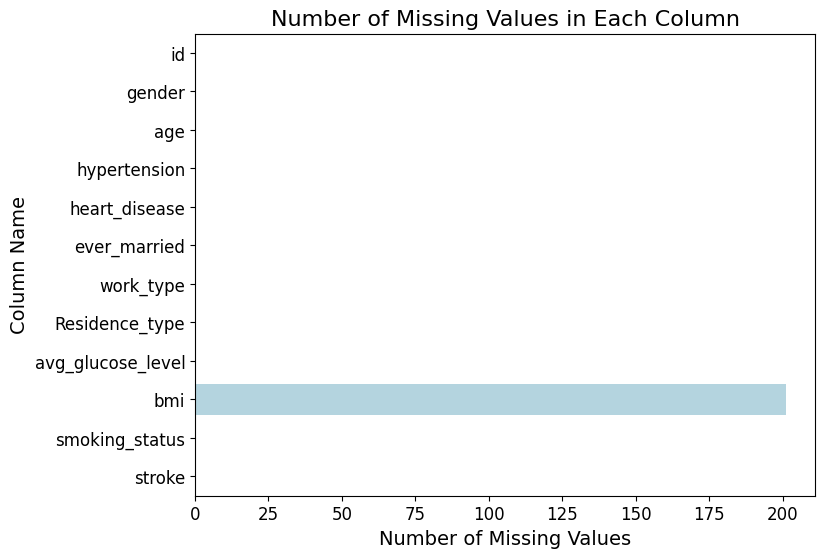

In [387]:
# Printing the number of N/A values in each column
null_values = stroke_data.isna().sum()
print("Number of missing values in each column:\n", null_values)

# Graphical representation of the na values present in the attribute - bar graph
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=null_values.values, y=null_values.index, color='lightblue')
ax.set_title('Number of Missing Values in Each Column', fontsize=16)
ax.set_xlabel('Number of Missing Values', fontsize=14)
ax.set_ylabel('Column Name', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()


- During processing the data, we will get the count of missing values for each column. Notably, the 'bmi' column has 201 missing values.

### BMI Analysis
- This analysis provides a quick insight into the extent of missing data in the 'bmi' column, aiding in decision-making for handling missing values during data preprocessing.



In [388]:
# Calculate the percentage of missing values in the 'bmi' column

null_values = stroke_data.isna().sum()
bmi_missing_percentage = null_values['bmi'] / len(stroke_data) * 100

# Print the percentage of missing values in the 'bmi' column
print("Out of {} instances, {:.2f}% of them have missing values in the 'bmi' column.".format(len(stroke_data), bmi_missing_percentage))

# Print the percentage of missing values in the 'bmi' column
print("# Missing values in bmi per length: {:.2f}%".format(bmi_missing_percentage))

Out of 5110 instances, 3.93% of them have missing values in the 'bmi' column.
# Missing values in bmi per length: 3.93%


- This visualization will display the distribution of BMI in the dataset, highlighting the mean and median values, and providing  information about the skewness of the data. It aids in understanding the overall pattern and central tendency of the BMI values.

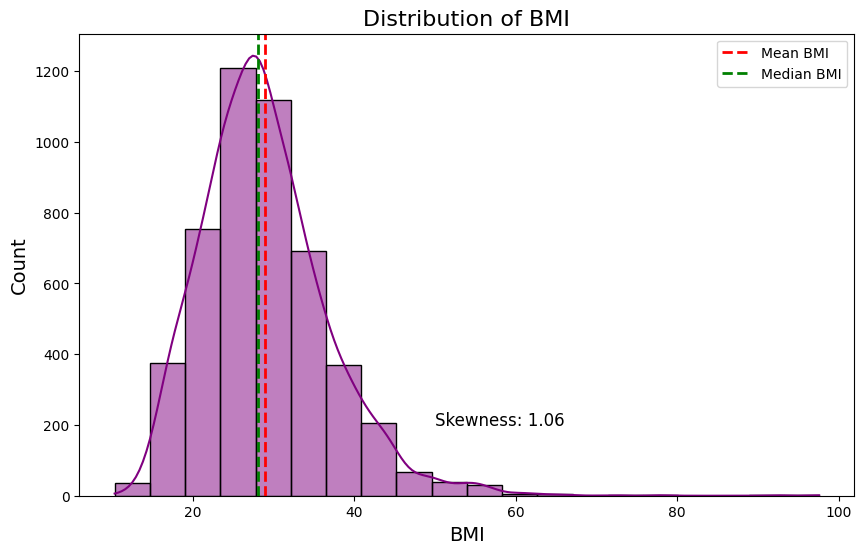

In [389]:
# Graphical representation of bmi attribute
plt.figure(figsize=(10,6))
sns.histplot(data=stroke_data, x='bmi', bins=20, kde=True, color='purple')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of BMI', fontsize=16)
plt.axvline(stroke_data['bmi'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean BMI')
plt.axvline(stroke_data['bmi'].median(), color='green', linestyle='dashed', linewidth=2, label='Median BMI')
plt.legend()
plt.text(50, 200, 'Skewness: {:.2f}'.format(stroke_data['bmi'].skew()), fontsize=12)
plt.show()


- Bmi is rightly skewed

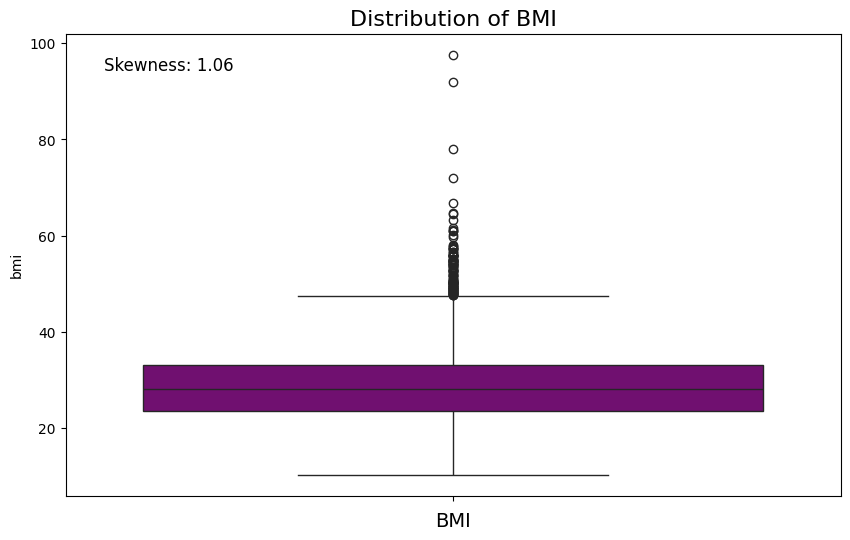

In [390]:
# Create a boxplot of the BMI distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=stroke_data['bmi'], color='purple')
plt.xlabel('BMI', fontsize=14)
plt.title('Distribution of BMI', fontsize=16)

# Add additional information to the plot
plt.text(0.05, 0.95, 'Skewness: {:.2f}'.format(stroke_data['bmi'].skew()), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

* Based on the histogram and boxplot we see that there are many outliers in bmi

Number of outliers in the 'bmi' column:  110


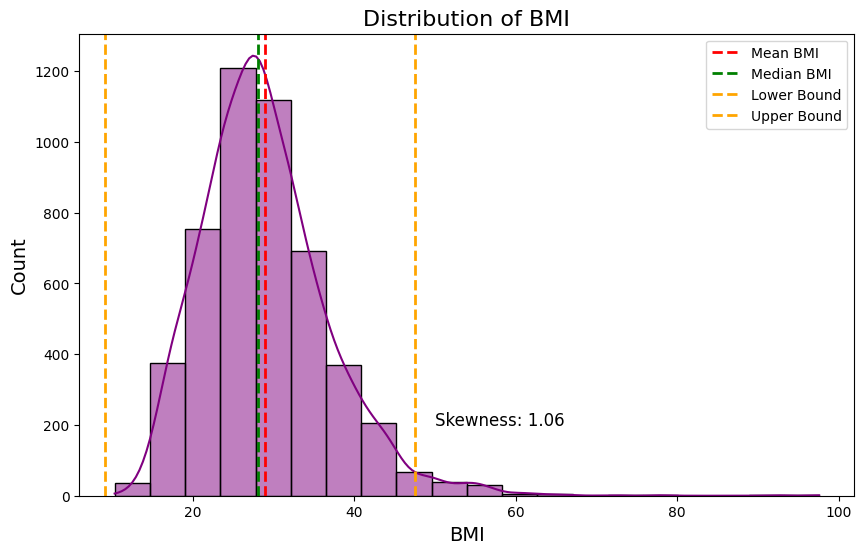

In [391]:
# Calculate the first and third quartiles of the 'bmi' column
Q1_bmi = stroke_data['bmi'].quantile(0.25)
Q3_bmi = stroke_data['bmi'].quantile(0.75)

# Calculate the interquartile range (IQR) of the 'bmi' column
IQR_bmi = Q3_bmi - Q1_bmi

# Detect outliers in the 'bmi' column using the IQR method
bmi_outliers = (stroke_data['bmi'] < (Q1_bmi - 1.5 * IQR_bmi)) | (stroke_data['bmi'] > (Q3_bmi + 1.5 * IQR_bmi))

# Print the number of outliers detected in the 'bmi' column
print("Number of outliers in the 'bmi' column: ", bmi_outliers.sum())

# Visualize the distribution of the 'bmi' column with outliers highlighted
plt.figure(figsize=(10,6))
sns.histplot(data=stroke_data, x='bmi', bins=20, kde=True, color='purple')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of BMI', fontsize=16)
plt.axvline(stroke_data['bmi'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean BMI')
plt.axvline(stroke_data['bmi'].median(), color='green', linestyle='dashed', linewidth=2, label='Median BMI')
plt.axvline(Q1_bmi - 1.5 * IQR_bmi, color='orange', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(Q3_bmi + 1.5 * IQR_bmi, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.legend()
plt.text(50, 200, 'Skewness: {:.2f}'.format(stroke_data['bmi'].skew()), fontsize=12)
plt.show()


In [392]:
# Calculate the number of people who had a stroke and have missing BMI values
stroke_with_na_bmi = stroke_data[stroke_data['bmi'].isna()]['stroke'].sum()

# Calculate the total number of people who had a stroke
total_stroke = stroke_data['stroke'].sum()

# Calculate the percentage of people with missing BMI values who had a stroke
percentage_of_stroke_with_na_bmi = stroke_with_na_bmi / total_stroke * 100

# Print the results of the calculations
print("Out of {:,} people who had a stroke, {:,} people have missing BMI values.".format(total_stroke, stroke_with_na_bmi))
print("This means that {:.2f}% of people who had a stroke have missing BMI values.".format(percentage_of_stroke_with_na_bmi))

Out of 249 people who had a stroke, 40 people have missing BMI values.
This means that 16.06% of people who had a stroke have missing BMI values.


- It is important to note that BMI is a crucial factor in determining the risk of stroke, and missing values can lead to inaccurate predictions.
Therefore, it is efficient to impute the missing values using appropriate techniques before performing any analysis or modeling on the data.

In [393]:
# Print the number of missing values in the 'bmi' column before imputation
print("Number of missing values in 'bmi' column before imputation: ", stroke_data['bmi'].isna().sum())

# Impute the missing values using the median of the 'bmi' column
median_bmi = stroke_data['bmi'].median()
stroke_data['bmi'] = stroke_data['bmi'].fillna(median_bmi)

# Print the number of missing values in the 'bmi' column after imputation
print("Number of missing values in 'bmi' column after imputation: ", stroke_data['bmi'].isna().sum())

# Print the median value of the 'bmi' column
print("The median value of 'bmi' column is: ", median_bmi)

Number of missing values in 'bmi' column before imputation:  201
Number of missing values in 'bmi' column after imputation:  0
The median value of 'bmi' column is:  28.1


### ID Analysis

- Since the id column is unique for each row, it is not useful for our analysis. Therefore, we will drop the id column by enhancing the efficiency of subsequent analyses.

In [394]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
stroke_data = stroke_data.drop(['id'],axis=1)

### Gender Analysis

- Checking the distribution of values in the 'gender' column:

In [395]:
# Checking the values in the gender column
stroke_data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

- To simplify and reduce dimensionality, 'Other' instances in the 'gender' column are replaced with 'Male'

In [396]:
# Removing the 'other' gender instance inorder to reduce the dimension and change it to Male
stroke_data['gender'] = stroke_data['gender'].replace('Other','Male')


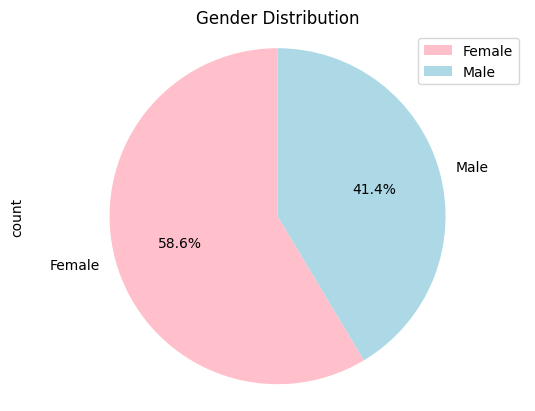

In [397]:
# Plotting a pie chart to visualize the gender count distribution
stroke_data['gender'].value_counts().plot(kind="pie", colors=['pink', 'lightblue'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.legend(loc = 'upper right', fontsize = 10)
plt.axis('equal')
plt.show()

### Hypertension Analysis

- The 'hypertension' column is examined to understand the distribution of values.
- The result will show the count of instances with and without hypertension (0 and 1, respectively).

In [398]:
# Checking the values in the hypertension column
stroke_data['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

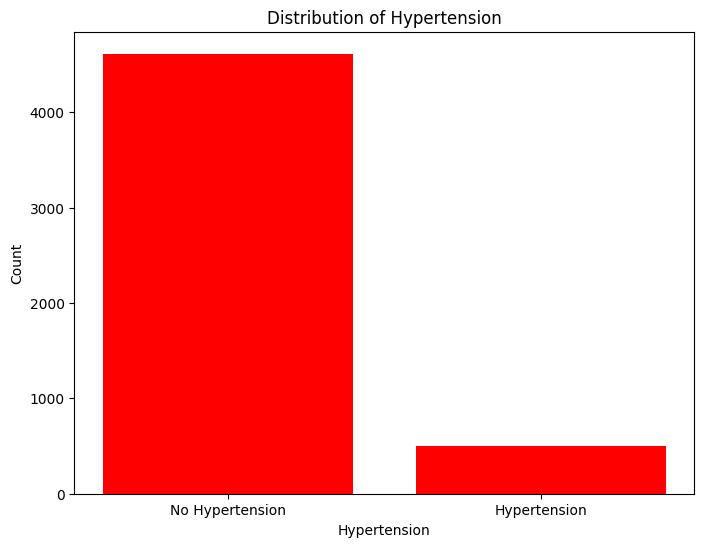

In [399]:
# Graphical representation of the value counts of the hypertension attribute
plt.figure(figsize=(8,6))
plt.bar(stroke_data['hypertension'].value_counts().index, stroke_data['hypertension'].value_counts().values, color='red')
plt.title('Distribution of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.show()


### Work Type Analysis
- The 'work_type' column is analyzed to understand the distribution of different work types.
- The result provides the count of instances for each work type category in the dataset.

In [400]:
# Value of count of work-type attribute
stroke_data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

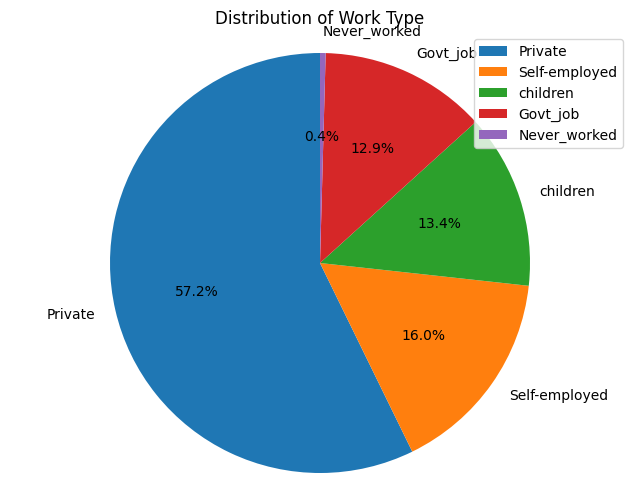

In [401]:
# Graphical representation of the value counts of the work-type attribute
plt.figure(figsize=(8,6))
plt.pie(stroke_data['work_type'].value_counts(), labels=stroke_data['work_type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Work Type')
plt.axis('equal')
plt.legend(loc = 'upper right', fontsize = 10)
plt.show()

### Smoking Status Analysis
- The 'smoking_status' column is examined to understand the distribution of smoking statuses.
- The result provides the count of instances for each smoking status category in the dataset.


In [402]:
# Value of count of smoking-status attribute
stroke_data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

- Replacing 'Unknown' values in the 'smoking_status' column with the mode.
- The updated distribution will be printed, and a pie chart will visually represent the new distribution of smoking statuses in the dataset.

Value counts of 'smoking_status' column after replacing 'Unknown' values with the mode: smoking_status
never smoked       3436
formerly smoked     885
smokes              789
Name: count, dtype: int64


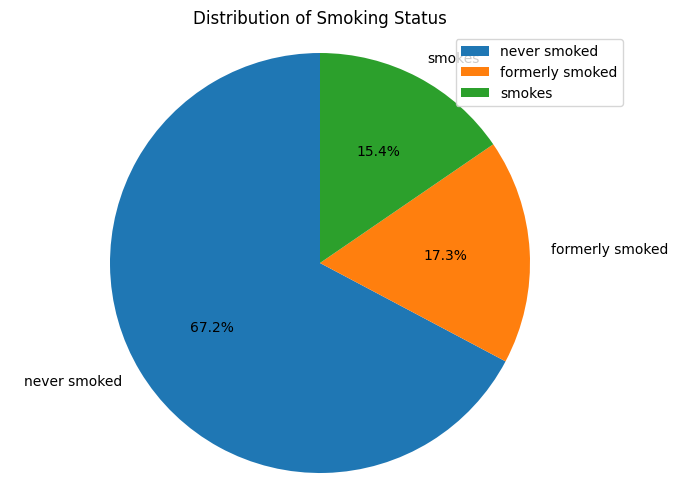

In [403]:
# Replace 'Unknown' values in the 'smoking_status' column with the mode
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace('Unknown', stroke_data['smoking_status'].mode()[0])

# Print the value counts of the 'smoking_status' column after replacing 'Unknown' values with the mode
print("Value counts of 'smoking_status' column after replacing 'Unknown' values with the mode:", stroke_data['smoking_status'].value_counts())

# Visualize the distribution of smoking status using a pie chart
plt.figure(figsize=(8,6))
plt.pie(stroke_data['smoking_status'].value_counts(), labels=stroke_data['smoking_status'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Smoking Status')
plt.axis('equal')
plt.legend(loc = 'upper right', fontsize = 10)
plt.show()


### Residence Type Analysis

- The 'Residence_type' column is analyzed to understand the distribution of residence types.
- The result provides the count of instances for each residence type category in the dataset.


In [404]:
# Value of count of residence attribute
stroke_data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

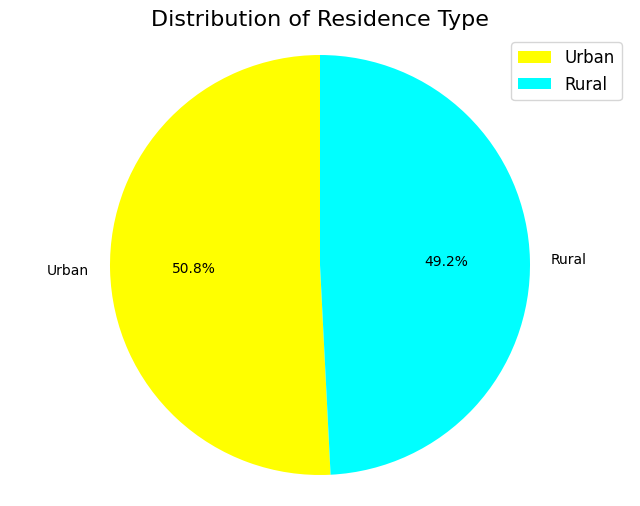

In [405]:
# Graphical representation of the value counts of the residence attribute
plt.figure(figsize=(8,6))
plt.pie( stroke_data['Residence_type'].value_counts().values, labels= stroke_data['Residence_type'].value_counts().index, colors=['yellow','cyan'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Residence Type', fontsize=16)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=12)
plt.show()


### Age Analysis
- Visualization illustrates the distribution of ages in the dataset using a histogram.
- The histogram includes mean and median lines, providing insights into the central tendency and skewness of the age data.

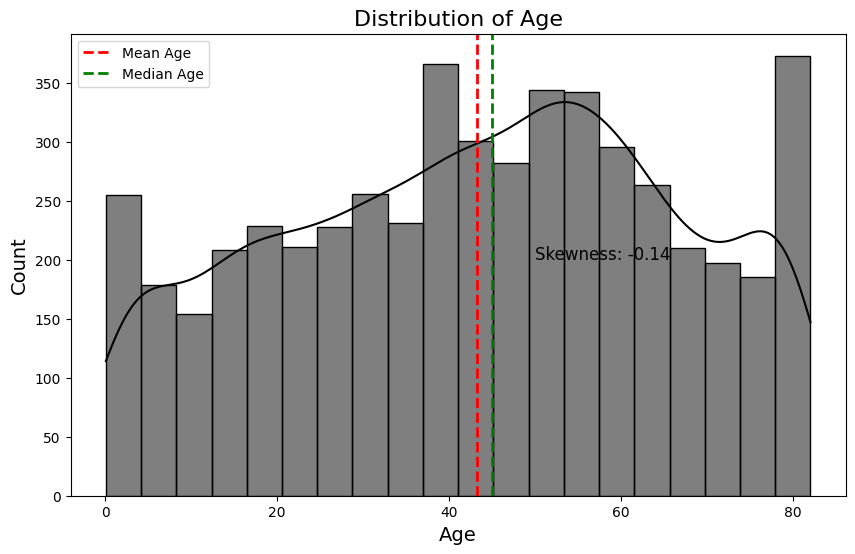

In [406]:
# Graphical representation fo the data in age column
plt.figure(figsize=(10,6))
sns.histplot(data=stroke_data['age'], color='black', bins=20,kde=True)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Age', fontsize=16)
plt.axvline(stroke_data['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(stroke_data['age'].median(), color='green', linestyle='dashed', linewidth=2, label='Median Age')
plt.legend()
plt.text(50, 200, 'Skewness: {:.2f}'.format(stroke_data['age'].skew()), fontsize=12)
plt.show()

- Visualization illustrates the distribution of ages in the dataset using a boxplot.
- The boxplot offers a summary of the age distribution, including skewness information.

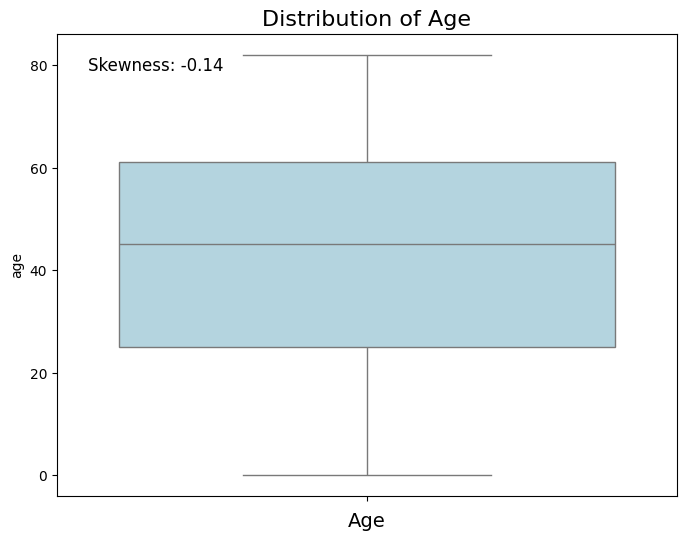

In [407]:
plt.figure(figsize=(8,6))
sns.boxplot(data=stroke_data['age'], color='lightblue')
plt.xlabel('Age', fontsize=14)
plt.title('Distribution of Age', fontsize=16)
plt.text(0.05, 0.95, 'Skewness: {:.2f}'.format(stroke_data['age'].skew()), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

- The age parameter values does not have any outliers
And has a normal distribution

### Heart Disease Analysis
- The 'heart_disease' column is analyzed to understand the distribution of instances with and without heart disease.
- The result provides the count of instances for each category in the dataset.

In [408]:
# Value count of heart disease attribute
stroke_data['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

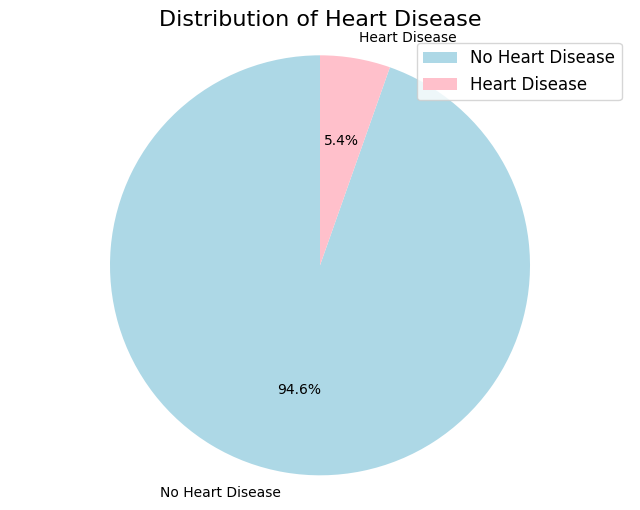

In [409]:
# Create a pie chart of the 'heart_disease' column
plt.figure(figsize=(8,6))
plt.pie(stroke_data['heart_disease'].value_counts(), labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribution of Heart Disease', fontsize=16)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=12)
plt.show()


### Marital Status Analysis
- The 'ever_married' column is analyzed to understand the distribution of individuals who have and haven't been married.
- The result provides the count of instances for each category in the dataset.

In [410]:
# Value count of evver married attribute
stroke_data['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

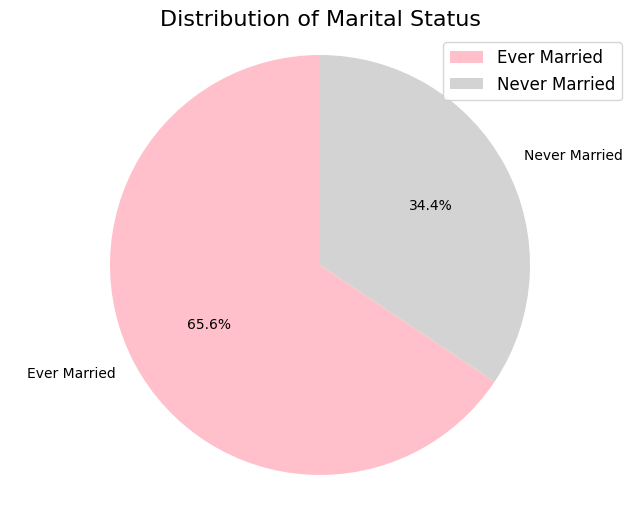

In [411]:
# Create the pie chart with percentage labels
plt.figure(figsize=(8,6))
plt.pie(stroke_data['ever_married'].value_counts(), labels=['Ever Married', 'Never Married'], autopct='%1.1f%%', startangle=90, colors=['pink', 'lightgrey'])
plt.title('Distribution of Marital Status', fontsize=16)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=12)
plt.show()


### Average Glucose Level Analysis
- The histogram visualizes the distribution of average glucose levels in the dataset.
- Mean and median lines are included, providing insights into the central tendency and skewness of the data.

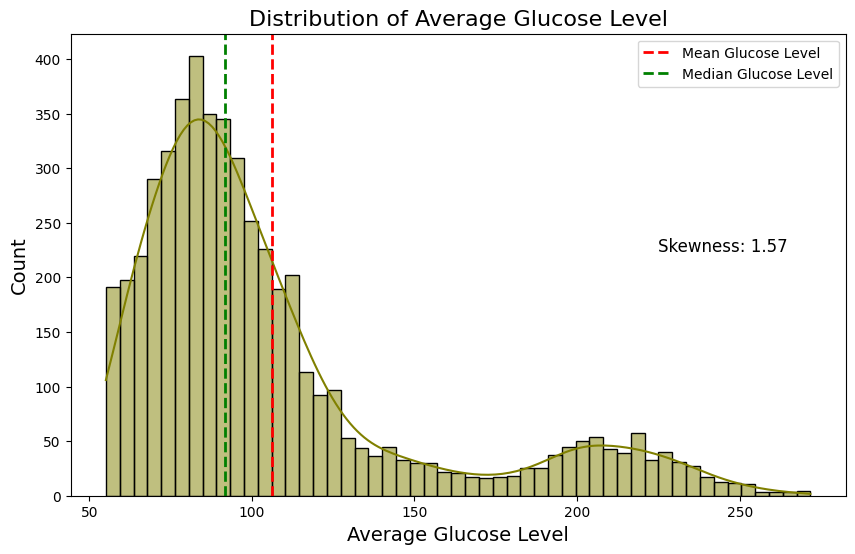

In [412]:
# Graphical representation of the average glucose level using a histogram
plt.figure(figsize=(10,6))
sns.histplot(data=stroke_data['avg_glucose_level'], color='olive', kde=True)
plt.xlabel('Average Glucose Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Average Glucose Level', fontsize=16)
plt.axvline(stroke_data['avg_glucose_level'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Glucose Level')
plt.axvline(stroke_data['avg_glucose_level'].median(), color='green', linestyle='dashed', linewidth=2, label='Median Glucose Level')
plt.legend()
plt.text(225, 224, 'Skewness: {:.2f}'.format(stroke_data['avg_glucose_level'].skew()), fontsize=12)
plt.show()


- The boxplot provides a summary of the distribution of average glucose levels in the dataset.
- Skewness information is included to understand the shape of the data distribution.

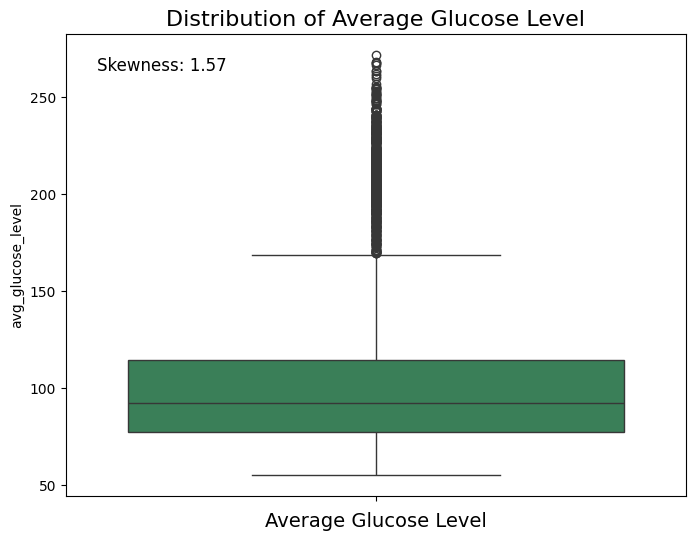

In [413]:
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=stroke_data['avg_glucose_level'], color='seagreen')
plt.xlabel('Average Glucose Level', fontsize=14)
plt.title('Distribution of Average Glucose Level', fontsize=16)
plt.text(0.05, 0.95, 'Skewness: {:.2f}'.format(stroke_data['avg_glucose_level'].skew()), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


Number of outliers in the 'avg_glucose_level' column:  627


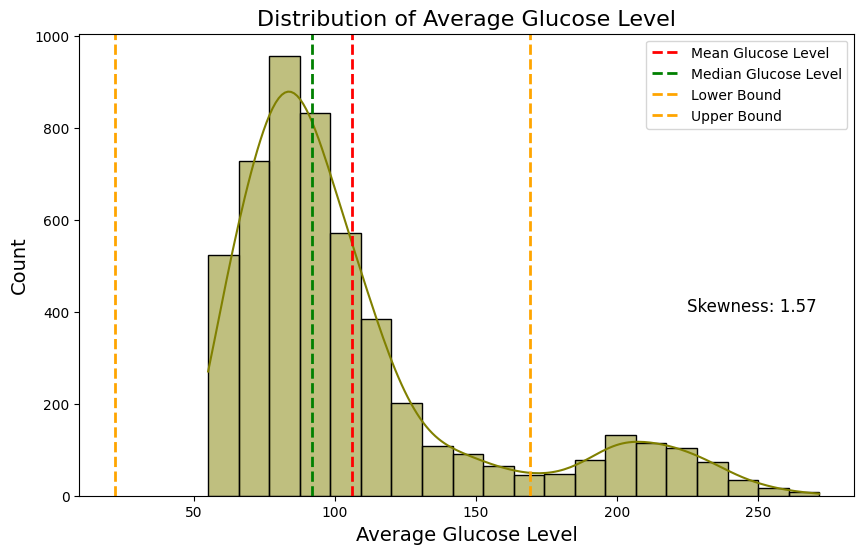

In [414]:
# Calculate the first and third quartiles of the 'avg_glucose_level' column
Q1_glucose = stroke_data['avg_glucose_level'].quantile(0.25)
Q3_glucose = stroke_data['avg_glucose_level'].quantile(0.75)

# Calculate the interquartile range (IQR) of the 'avg_glucose_level' column
IQR_glucose = Q3_glucose - Q1_glucose

# Detect outliers in the 'avg_glucose_level' column using the IQR method
glucose_level_outliers = (stroke_data['avg_glucose_level'] < (Q1_glucose - 1.5 * IQR_glucose)) | (stroke_data['avg_glucose_level'] > (Q3_glucose + 1.5 * IQR_glucose))

# Print the number of outliers detected in the 'avg_glucose_level' column
print("Number of outliers in the 'avg_glucose_level' column: ", glucose_level_outliers.sum())

# Visualize the distribution of the 'avg_glucose_level' column with outliers highlighted
plt.figure(figsize=(10,6))
sns.histplot(data=stroke_data, x='avg_glucose_level', bins=20, kde=True, color='olive')
plt.xlabel('Average Glucose Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Average Glucose Level', fontsize=16)
plt.axvline(stroke_data['avg_glucose_level'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Glucose Level')
plt.axvline(stroke_data['avg_glucose_level'].median(), color='green', linestyle='dashed', linewidth=2, label='Median Glucose Level')
plt.axvline(Q1_glucose - 1.5 * IQR_glucose, color='orange', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(Q3_glucose + 1.5 * IQR_glucose, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.legend()
plt.text(225, 400, 'Skewness: {:.2f}'.format(stroke_data['avg_glucose_level'].skew()), fontsize=12)
plt.show()


### Skewness of Feature Variables (BMI and Average Glucose Level)

- The skewness of the 'bmi' and 'avg_glucose_level' columns is calculated to understand the shape of the data distribution.
- The result shows that both columns are rightly skewed.
- The skewness of the 'bmi' column is 1.06, and the skewness of the 'avg_glucose_level' column is 1.57.

In [415]:

# Log transformation of the 'avg_glucose_level' column and 'bmi' column

#stroke_data['bmi'] = np.log1p(stroke_data['bmi'])
#stroke_data['avg_glucose_level'], _ = boxcox(stroke_data['avg_glucose_level'])

# Box-Cox transformation of the 'avg_glucose_level' column and 'bmi' column

#stroke_data['bmi'], _ = boxcox(stroke_data['bmi'])
#stroke_data['avg_glucose_level'] = np.log1p(stroke_data['avg_glucose_level'])


- After testing of all the models we will not remove the skewness because by removing skewness we are overfitting the data and the accuracy of all the models will decrease.

### Correlation Analysis
- The dataset information is displayed after completing all preprocessing steps.
- The data types, non-null counts, and memory usage are provided for each column.
- The dataset is now ready for the model-building process.

In [416]:
# After all the preprocessing steps, the dataset is ready for the model building process
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


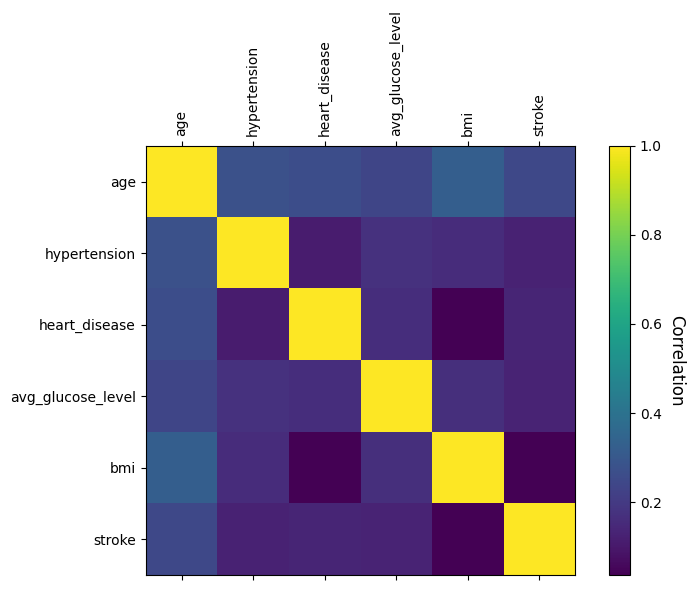

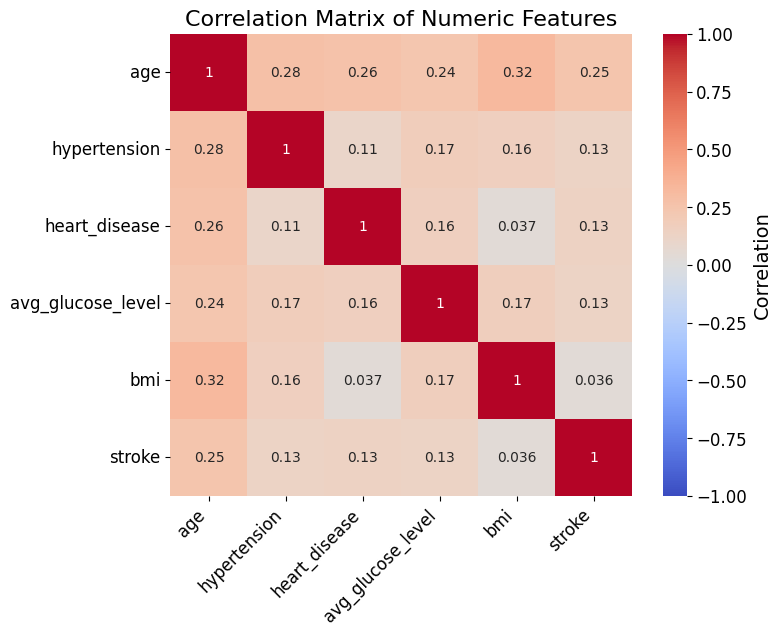

In [417]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
numeric_data = stroke_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
im = ax.matshow(correlation_matrix)
ax.set_xticks(np.arange(numeric_data.shape[1]))
ax.set_yticks(np.arange(numeric_data.shape[1]))
ax.set_xticklabels(numeric_data.columns,rotation=90)
ax.set_yticklabels(numeric_data.columns)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()

# Create a correlation matrix of the numeric columns in the dataset
numeric_data = stroke_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, ax=ax)

ax.set_title('Correlation Matrix of Numeric Features', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=12)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_ylabel('Correlation', fontsize=14)

plt.show()



The correlation matrix will provide insights into the relationships between the attributes in the dataset.

##### Distribution of Numeric Features
- The distribution of numerical features is displayed using histograms.


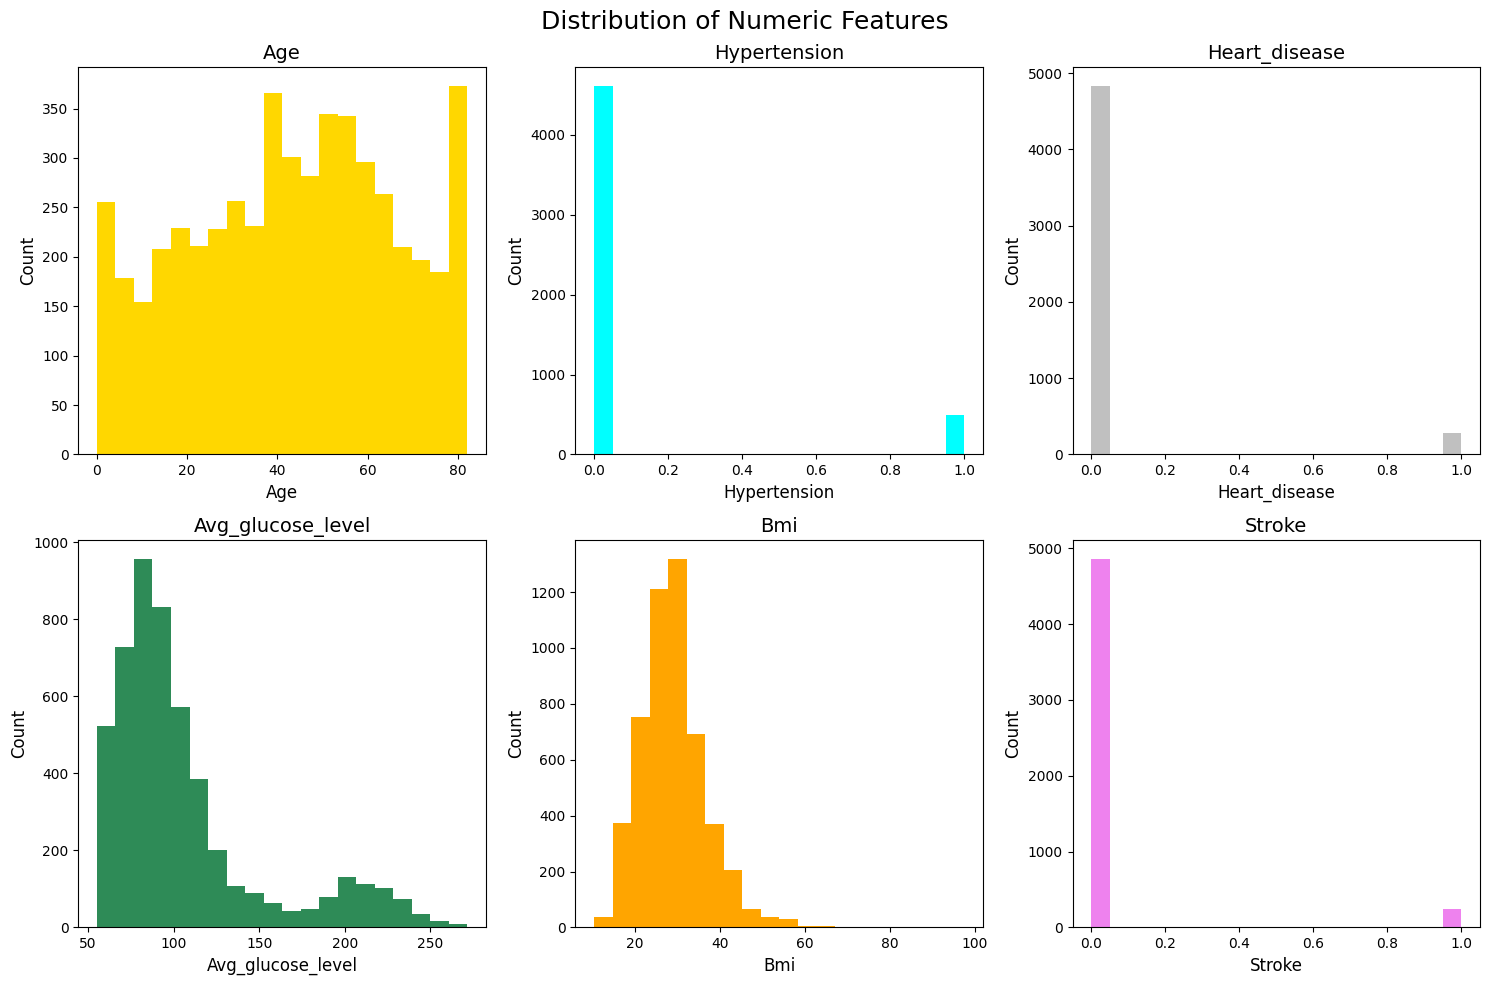

In [418]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Set the color scheme
colors = ['gold','cyan','silver','seagreen','orange','violet']

# Create a histogram for each numeric column in the dataset
for i, column in enumerate(stroke_data.select_dtypes(include=[np.number])):
    ax = axs[i//3, i%3]
    ax.hist(stroke_data[column], bins=20, color=colors[i%6])
    ax.set_title(column.capitalize(), fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Add a main title to the figure
fig.suptitle('Distribution of Numeric Features', fontsize=18)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Target Variable Analysis: Stroke
- The 'stroke' column is analyzed to understand the distribution of instances with and without stroke.
- The result provides the count of instances for each category in the dataset.

In [419]:
# Value count in the stroke attribute
stroke_data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

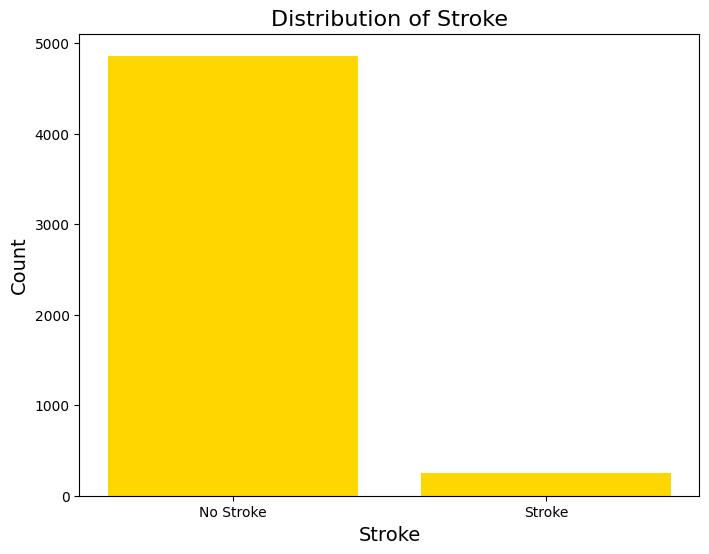

In [420]:
# Graphical representation of the value count distribution of the target attribute
plt.figure(figsize=(8,6))
plt.bar(stroke_data['stroke'].value_counts().index, stroke_data['stroke'].value_counts().values, color='gold')
plt.title('Distribution of Stroke', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

In [421]:
# Value count in the stroke attribute

print("% of people who had a stroke: {:.2f}%".format(total_stroke / len(stroke_data) * 100))
print("% of people who did not have a stroke: {:.2f}%".format((len(stroke_data) - total_stroke) / len(stroke_data) * 100))

% of people who had a stroke: 4.87%
% of people who did not have a stroke: 95.13%


## Understanding the Skewness of Target Variable

- Our target variable is highly skewed, with only around 5% of the instances experiencing a stroke. This presents a challenge when building a predictive model, as the model may be biased towards the majority class and perform poorly on the minority class.

- To address this issue, we will need to perform necessary transformations to improve the representation of the minority class in our dataset. This may include techniques such as oversampling, undersampling, or generating synthetic samples using techniques such as SMOTE.

- By improving the representation of the minority class, we can build a more accurate and robust predictive model that can identify individuals who are at risk of experiencing a stroke.

### One Hot Encoding
- One-hot encoding is applied to categorical columns, creating new binary columns for each unique value.
- The shape of the dataset will be printed to confirm the number of new columns created after one-hot encoding.

In [422]:
# Encode categorical variables using one-hot encoding
# This will create new columns for each unique value in the categorical columns
# The new columns will have binary values (0 or 1) indicating whether or not the original value was present in the row
stroke_data = pd.get_dummies(stroke_data, columns=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Print the shape of the encoded dataset to confirm the number of new columns created
print("Shape of encoded dataset:", stroke_data.shape)


Shape of encoded dataset: (5110, 15)


### Oversampling
- SMOTE is applied to oversample the minority class (instances with stroke) and balance the dataset.
- The shape and class distribution of the original and resampled datasets are printed for comparison.

In [423]:
# Create an instance of the SMOTE class with a sampling strategy of 'minority'
# This will generate synthetic samples for the minority class (i.e., instances with a stroke) to balance the dataset 
# The random_state parameter is set to 42 to ensure reproducibility of the results
smote = SMOTE(sampling_strategy='minority' , random_state=42)

# Separate the features (X) and target variable (y) from the dataset
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

# Use SMOTE to oversample the minority class and balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the shape of the original and resampled datasets to compare the number of instances in each class
print("Shape of original dataset:", X.shape)
print("Number of instances with stroke in original dataset:", y.sum())
print("Shape of resampled dataset:", X_resampled.shape)
print("Number of instances with stroke in resampled dataset:", y_resampled.sum())

Shape of original dataset: (5110, 14)
Number of instances with stroke in original dataset: 249
Shape of resampled dataset: (9722, 14)
Number of instances with stroke in resampled dataset: 4861


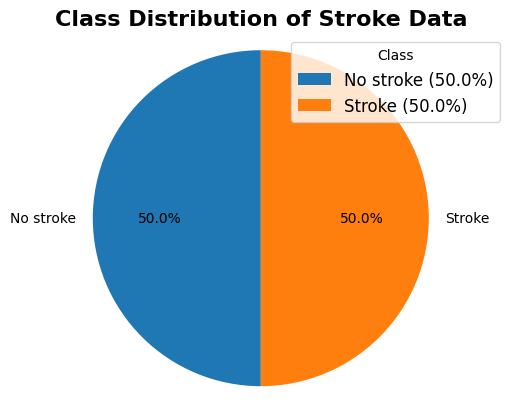

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [424]:
_, class_counts = np.unique(y_resampled, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class Distribution of Stroke Data', fontsize=16, fontweight='bold')
plt.legend(title='Class', loc='upper right', labels=['{} ({:.1f}%)'.format(class_names[i], class_counts[i]/sum(class_counts)*100) for i in range(len(class_names))], fontsize=12)
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [425]:
# Display the dataframe after performing dummy attributes
display(stroke_data.head())

,age,avg_glucose_level,bmi,stroke,hypertension_1,heart_disease_1,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,False,True,True,True,False,True,False,False,True,False,False
1,61.0,202.21,28.1,1,False,False,False,True,False,False,True,False,False,True,False
2,80.0,105.92,32.5,1,False,True,True,True,False,True,False,False,False,True,False
3,49.0,171.23,34.4,1,False,False,False,True,False,True,False,False,True,False,True
4,79.0,174.12,24.0,1,True,False,False,True,False,False,True,False,False,True,False


### Train Test Split
- The dataset is split into training and testing sets with a specified test size.
- The class distribution for each set is printed and visualized using pie charts.


Training set class distribution:
 stroke
1    3891
0    3886
Name: count, dtype: int64

Testing set class distribution:
 stroke
0    975
1    970
Name: count, dtype: int64


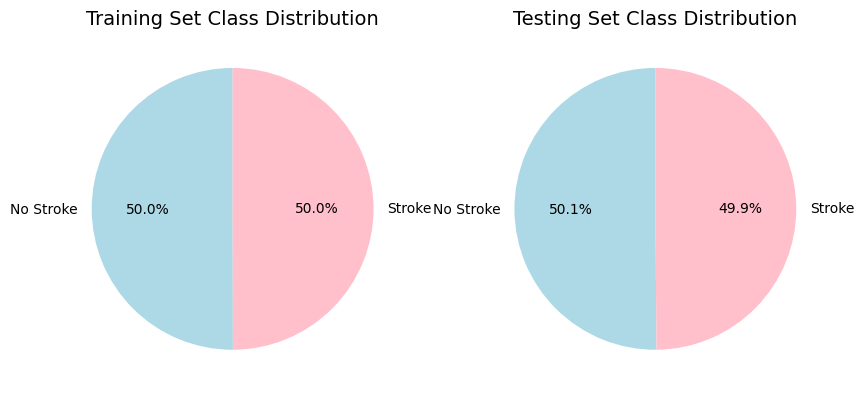

In [426]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the number of instances in each class for the training and testing sets
train_counts = pd.Series(y_train).value_counts()
test_counts = pd.Series(y_test).value_counts()
print("Training set class distribution:\n", train_counts)
print("\nTesting set class distribution:\n", test_counts)

# Visualize the class distribution of the training and testing sets
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].pie(train_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
axs[0].set_title('Training Set Class Distribution', fontsize=14)
axs[1].pie(test_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
axs[1].set_title('Testing Set Class Distribution', fontsize=14)
plt.show()

### Feature Scaling 
- StandardScaler is used to standardize the features in the training and testing sets.
- fit_transform() is applied to the training set, fitting the scaler to the training data and transforming it.
- transform() is used on the testing set to apply the same scaling transformation as the training set.
- Standardization ensures that all features are on the same scale, preventing certain features from dominating the model and improving algorithm convergence.


In [427]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Scale the features in the training set using the fit_transform() method
X_train_std = scaler.fit_transform(X_train)

# Scale the features in the testing set using the transform() method
X_test_std = scaler.transform(X_test)

## Model Building

#### Sensitivity and Specificity Calculator Function
- This function will calculate the sensitivity and specificity of a model, given the true labels and predicted labels.
- Sensitivity is the proportion of actual positives that are correctly identified as positive (e.g., the percentage of stroke patients who are correctly identified as having a stroke).
- Specificity is the proportion of actual negatives that are correctly identified as negative (e.g., the percentage of non-stroke patients who are correctly identified as not having a stroke).

In [428]:
# Define a function to calculate sensitivity and specificity
def sens_specs_calculator(y_true, y_pred):
    # Calculate the confusion matrix of the model
    conf_matrix_model = confusion_matrix(y_true, y_pred)

    # Extract the true negatives, false positives, false negatives, and true positives from the confusion matrix
    true_negatives = conf_matrix_model[0][0]
    false_positives = conf_matrix_model[0][1]
    false_negatives = conf_matrix_model[1][0]
    true_positives = conf_matrix_model[1][1]

    # Calculate the sensitivity and specificity of the model
    sensitivity_model = true_positives / (true_positives + false_negatives)
    specificity_model = true_negatives / (true_negatives + false_positives)

    # Return the sensitivity and specificity
    return sensitivity_model, specificity_model

### Decision Tree (DT)

- The provided code demonstrates the implementation and evaluation of a Decision Tree Classifier in machine learning. I
- It begins by creating and training the model using standardized training data.
- Subsequently, the trained model predicts labels and class probabilities for standardized testing data, enabling the calculation of key evaluation metrics like accuracy, area under the ROC curve, F1 score, precision, and recall. Additionally, it computes sensitivity, specificity, and generates a detailed classification report, presenting a comprehensive analysis of the model's performance in classification tasks on the test data.
- Thus, The Decision Tree model will be trained, evaluated, and its performance metrics printed.






In [429]:
# Create an instance of the DecisionTreeClassifier class with a random state of 42
model_dt = DecisionTreeClassifier(random_state=42)

# Fit the decision tree model to the standardized training data
model_dt.fit(X_train_std, y_train)

# Use the trained model to make predictions on the standardized testing data
y_dt = model_dt.predict(X_test_std)

# Use the trained model to predict the class probabilities for the standardized testing data
y_prob_dt = model_dt.predict_proba(X_test_std)

# Calculate the accuracy of the decision tree model on the testing data
accuracy_dt = accuracy_score(y_test, y_dt)

# Calculate the area under the ROC curve for the decision tree model on the testing data
auc_dt = roc_auc_score(y_test, y_prob_dt[:, 1])

# Calculate the F1 score for the decision tree model on the testing data
f1_dt = f1_score(y_test, y_dt)

# Calculate the precision for the decision tree model on the testing data
precision_dt = precision_score(y_test, y_dt)

# Calculate the recall for the decision tree model on the testing data
recall_dt = recall_score(y_test, y_dt)

# Print the accuracy, AUC, F1 score, precision, and recall for the decision tree model
print("Decision Tree Model")
print("Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("AUC: {:.2f}".format(auc_dt))
print("F1 score: {:.2f}".format(f1_dt))
print("Precision: {:.2f}".format(precision_dt))
print("Recall: {:.2f}".format(recall_dt))

# Calculate the false positive rate and true positive rate for the decision tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt[:, 1])

# Calculate the sensitivity and specificity of the decision tree model
sensitivity_dt, specificity_dt = sens_specs_calculator(y_test, y_dt)

# Print the sensitivity and specificity of the decision tree model
print("Sensitivity: {:.2f}%".format(sensitivity_dt * 100))
print("Specificity: {:.2f}%".format(specificity_dt * 100))

# Print the classification report for the decision tree model
print("\nClassification Report:\n", classification_report(y_test, y_dt))

Decision Tree Model
Accuracy: 93.06%
AUC: 0.93
F1 score: 0.93
Precision: 0.92
Recall: 0.95
Sensitivity: 94.64%
Specificity: 91.49%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       975
           1       0.92      0.95      0.93       970

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



- The confusion matrix is visualized using Seaborn's heatmap.
- The diagonal elements represent correct predictions (True Positive and True Negative).
- Off-diagonal elements represent errors (False Positive and False Negative).
- Annotated values in each cell indicate the count of instances.
- This visualization provides insights into the performance of the Decision Tree model.

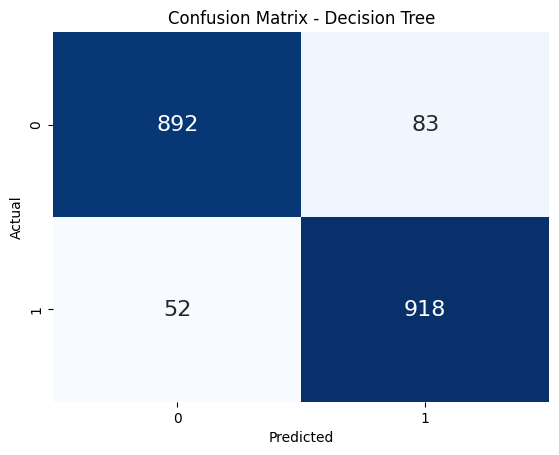

In [430]:
# Plot the confusion matrix for the decision tree model
conf_matrix_dt = confusion_matrix(y_test, y_dt)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

- The ROC curve illustrates the trade-off between sensitivity and specificity at various thresholds.
- The area under the curve (AUC) quantifies the model's ability to distinguish between positive and negative instances.
- A model with a higher AUC is considered better at classification.
- The diagonal dashed line represents random guessing, and the closer the curve to the top-left corner, the better the model.

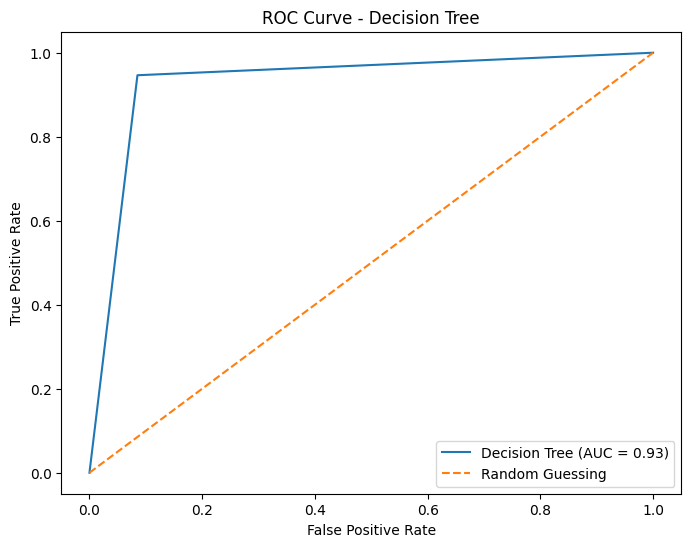

In [431]:
# Plot the ROC curve for the decision tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

### Logistic Regression (LR)

- The provided code will exemplify the utilization and assessment of a Logistic Regression Classifier in machine learning. 
- It initializes the model with specific configurations—using the 'lbfgs' solver and a random state of 42—then proceeds to train the model with standardized training data.
- After training, it predicts labels and class probabilities for standardized testing data, facilitating the computation of crucial evaluation metrics including accuracy, area under the ROC curve, F1 score, precision, and recall. 
- Moreover, it calculates sensitivity, specificity, and presents a detailed classification report, offering a comprehensive overview of the model's performance in classifying the test data.
- The Logistic Regression model will be trained, evaluated, and its performance metrics printed.


In [432]:

# Create an instance of the logistic regression classifier with a lbfgs solver and random state of 42
model_lr = LogisticRegression(solver='lbfgs', random_state=42)

# Fit the logistic regression model to the standardized training data
model_lr.fit(X_train_std, y_train)

# Use the trained model to make predictions on the standardized testing data
y_lr = model_lr.predict(X_test_std)

# Use the trained model to predict the class probabilities for the standardized testing data
y_prob_lr = model_lr.predict_proba(X_test_std)

# Calculate the accuracy of the logistic regression model on the testing data
accuracy_lr = accuracy_score(y_test, y_lr)

# Calculate the area under the ROC curve for the logistic regression model on the testing data
auc_lr = roc_auc_score(y_test, y_prob_lr[:, 1])

# Calculate the F1 score for the logistic regression model on the testing data
f1_lr = f1_score(y_test, y_lr)

# Calculate the precision for the logistic regression model on the testing data
precision_lr = precision_score(y_test, y_lr)

# Calculate the recall for the logistic regression model on the testing data
recall_lr = recall_score(y_test, y_lr)

# Print the accuracy, AUC, F1 score, precision, and recall for the logistic regression model
print("Logistic Regression Model")
print("Accuracy: {:.2f}%".format(accuracy_lr * 100))
print("AUC: {:.2f}".format(auc_lr))
print("F1 score: {:.2f}".format(f1_lr))
print("Precision: {:.2f}".format(precision_lr))
print("Recall: {:.2f}".format(recall_lr))

# Calculate the false positive rate and true positive rate for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr[:, 1])

# Calculate the sensitivity and specificity of the logistic regression model
sensitivity_lr, specificity_lr = sens_specs_calculator(y_test, y_lr)

# Print the sensitivity and specificity of the logistic regression model
print("Sensitivity: {:.2f}%".format(sensitivity_lr * 100))
print("Specificity: {:.2f}%".format(specificity_lr * 100))

# Print the classification report for the logistic regression model
print("\nClassification Report:\n", classification_report(y_test, y_lr))

Logistic Regression Model
Accuracy: 85.96%
AUC: 0.93
F1 score: 0.86
Precision: 0.85
Recall: 0.87
Sensitivity: 86.91%
Specificity: 85.03%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       975
           1       0.85      0.87      0.86       970

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945



- The confusion matrix is plotted using Seaborn's heatmap.
- The diagonal elements represent the correct predictions (True Positive and True Negative).
- The off-diagonal elements represent the errors (False Positive and False Negative).
- The annotated values in each cell show the count of instances.
- This visualization provides insights into the performance of the Logistic Regression model.

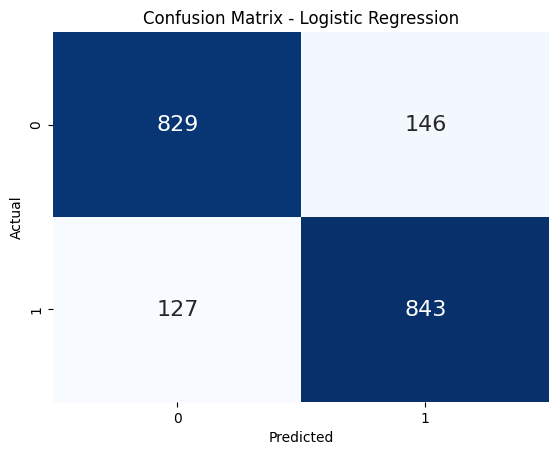

In [433]:
# Plot the confusion matrix for the logistic regression model
conf_matrix_lr = confusion_matrix(y_test, y_lr)
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

- The ROC curve illustrates the trade-off between sensitivity and specificity at various thresholds.
- The area under the curve (AUC) quantifies the model's ability to distinguish between positive and negative instances.
- A model with a higher AUC is considered better at classification.
- The diagonal dashed line represents random guessing, and the closer the curve to the top-left corner, the better the model.

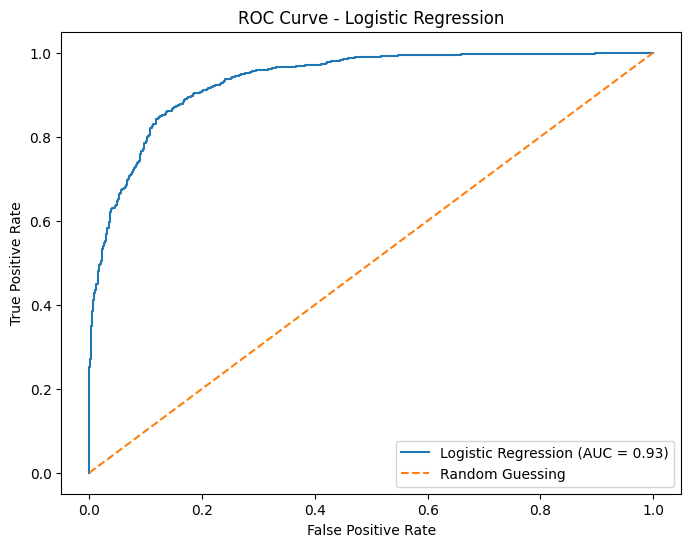

In [434]:
# Plot the ROC curve for the logistic regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### Support Vector Machine (SVM)

- It's a powerful supervised learning algorithm used for classification tasks.
- We have used an instance of the SVM classifier with a radial basis function (RBF) kernel, probability estimates enabled, and a random state of 42. It then fits the SVM model to the standardized training data, predicts on the standardized testing data, and 
 calculates various evaluation metrics.

- The fit method is applied to train the SVM model on the standardized training data (X_train_std and y_train).
- The trained model is used to predict the target values for the standardized testing data (X_test_std) using the predict method.
- Probability estimates are calculated for the testing data using the predict_proba method to evaluate the area under the ROC curve (AUC).

In [435]:
# Create an instance of the SVM classifier with a radial basis function (RBF) kernel, probability estimates enabled and a random state of 42
model_svm = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the SVM model to the standardized training data
model_svm.fit(X_train_std, y_train)

# Use the trained model to make predictions on the standardized testing data
y_svm = model_svm.predict(X_test_std)

# Use the trained model to predict the class probabilities for the standardized testing data
y_prob_svm = model_svm.predict_proba(X_test_std)

# Calculate the accuracy of the SVM model on the testing data
accuracy_svm = accuracy_score(y_test, y_svm)

# Calculate the area under the ROC curve for the SVM model on the testing data
auc_svm = roc_auc_score(y_test, y_prob_svm[:, 1])

# Calculate the F1 score for the SVM model on the testing data
f1_svm = f1_score(y_test, y_svm)

# Calculate the precision for the SVM model on the testing data
precision_svm = precision_score(y_test, y_svm)

# Calculate the recall for the SVM model on the testing data
recall_svm = recall_score(y_test, y_svm)

# Print the accuracy, AUC, F1 score, precision, and recall for the SVM model
print("Support Vector Machine Model")
print("Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("AUC: {:.2f}".format(auc_svm))
print("F1 score: {:.2f}".format(f1_svm))
print("Precision: {:.2f}".format(precision_svm))
print("Recall: {:.2f}".format(recall_svm))

# Calculate the false positive rate and true positive rate for the SVM model
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm[:, 1])

# Calculate the sensitivity and specificity of the SVM model
sensitivity_svm, specificity_svm = sens_specs_calculator(y_test, y_svm)

# Print the sensitivity and specificity of the SVM model
print("Sensitivity: {:.2f}%".format(sensitivity_svm * 100))
print("Specificity: {:.2f}%".format(specificity_svm * 100))

# Print the classification report for the SVM model
print("\nClassification Report:\n", classification_report(y_test, y_svm))

Support Vector Machine Model
Accuracy: 87.92%
AUC: 0.95
F1 score: 0.88
Precision: 0.87
Recall: 0.90
Sensitivity: 89.59%
Specificity: 86.26%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       975
           1       0.87      0.90      0.88       970

    accuracy                           0.88      1945
   macro avg       0.88      0.88      0.88      1945
weighted avg       0.88      0.88      0.88      1945




- The below code creates a heatmap visualization of the confusion matrix for the SVM model's predictions on the test set.
- This visualization allows for a quick and visual assessment of the SVM model's performance in predicting different classes and identifying misclassifications between actual and predicted values.







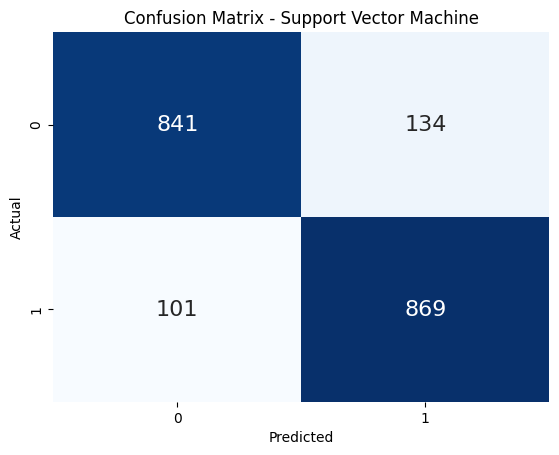

In [436]:
# Plot the confusion matrix for the SVM model
conf_matrix_svm = confusion_matrix(y_test, y_svm)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

- The below code generates an ROC (Receiver Operating Characteristic) curve for the Support Vector Machine (SVM) model.
- plt.figure(figsize=(8, 6)) creates a figure with a specific size to accommodate the ROC curve.
- plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (AUC = {:.2f})'.format(auc_svm)) plots the ROC curve using the false positive rate (fpr_svm) on the x-axis and the true positive rate (tpr_svm) on the y-axis. The label includes the AUC (Area Under the Curve) value for the SVM model.
- plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing') adds a dashed diagonal line representing random guessing, where the model's performance is no better than chance.

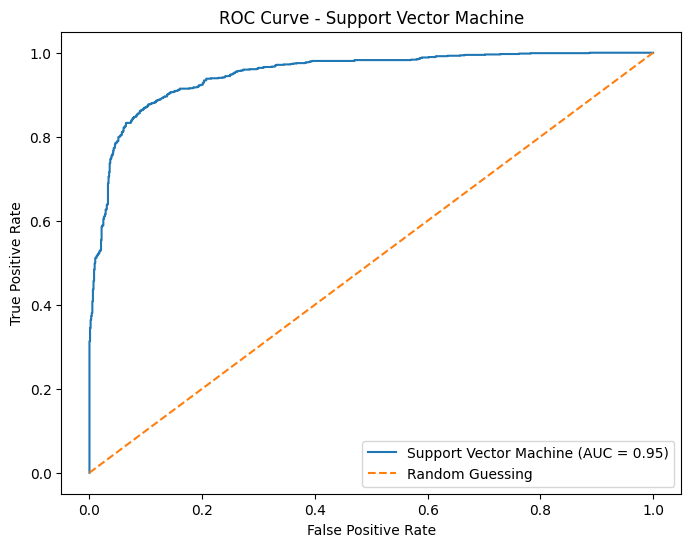

In [437]:
# Plot the ROC curve for the SVM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (AUC = {:.2f})'.format(auc_svm))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend()
plt.show()

### Gaussian Naive Bayes (GNB)

- Gaussian Naive Bayes(GNB) is a probabilistic machine learning algorithm based on Bayes' theorem with an assumption that the features follow a Gaussian (normal) distribution.

 - The below code provided demonstrates the implementation and evaluation of a Gaussian Naive Bayes (GNB) classifier on standardized testing data. Here's a breakdown of the process:

  - Model Initialization: An instance of the Gaussian Naive Bayes classifier (GaussianNB()) is created.
  - Model Fitting: The GNB model is fitted or trained using the standardized training data (X_train_std, y_train).
  - Prediction: The trained GNB model is used to predict class labels for the standardized testing data (X_test_std).
  - Class Probabilities: Probabilities for each class are predicted for the testing data using predict_proba.
  - Evaluation Metrics Calculation: Various evaluation metrics are calculated for the GNB model using the predicted labels (y_gnb) and predicted probabilities (y_prob_gnb):

In [438]:
# Create an instance of the Gaussian Naive Bayes (GNB) classifier
model_gnb = GaussianNB()

# Fit the GNB model to the standardized training data
model_gnb.fit(X_train_std, y_train)

# Use the trained model to make predictions on the standardized testing data
y_gnb = model_gnb.predict(X_test_std)

# Use the trained model to predict the class probabilities for the standardized testing data
y_prob_gnb = model_gnb.predict_proba(X_test_std)

# Calculate the accuracy of the GNB model on the testing data
accuracy_gnb = accuracy_score(y_test, y_gnb)

# Calculate the area under the ROC curve for the GNB model on the testing data
auc_gnb = roc_auc_score(y_test, y_prob_gnb[:, 1])

# Calculate the F1 score for the GNB model on the testing data
f1_gnb = f1_score(y_test, y_gnb)

# Calculate the precision for the GNB model on the testing data
precision_gnb = precision_score(y_test, y_gnb)

# Calculate the recall for the GNB model on the testing data
recall_gnb = recall_score(y_test, y_gnb)

# Print the accuracy, AUC, F1 score, precision, and recall for the GNB model
print("Gaussian Naive Bayes Model")
print("Accuracy: {:.2f}%".format(accuracy_gnb * 100))
print("AUC: {:.2f}".format(auc_gnb))
print("F1 score: {:.2f}".format(f1_gnb))
print("Precision: {:.2f}".format(precision_gnb))
print("Recall: {:.2f}".format(recall_gnb))

# Calculate the false positive rate and true positive rate for the GNB model
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb[:, 1])

# Calculate the sensitivity and specificity of the GNB model
sensitivity_gnb, specificity_gnb = sens_specs_calculator(y_test, y_gnb)

# Print the sensitivity and specificity of the GNB model
print("Sensitivity: {:.2f}%".format(sensitivity_gnb * 100))
print("Specificity: {:.2f}%".format(specificity_gnb * 100))

# Print the classification report for the GNB model
print("\nClassification Report:\n", classification_report(y_test, y_gnb))


Gaussian Naive Bayes Model
Accuracy: 66.32%
AUC: 0.89
F1 score: 0.74
Precision: 0.60
Recall: 0.97
Sensitivity: 97.11%
Specificity: 35.69%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.36      0.52       975
           1       0.60      0.97      0.74       970

    accuracy                           0.66      1945
   macro avg       0.76      0.66      0.63      1945
weighted avg       0.76      0.66      0.63      1945



- The below code generates a heatmap to visualize the confusion matrix for the Gaussian Naive Bayes (GNB) model.
- The confusion matrix for the GNB model is computed using the confusion_matrix function from scikit-learn. This matrix contains information about the true positive, true negative, false positive, and false negative predictions made by the GNB model.
- Heatmap Plotting: The sns.heatmap function from the Seaborn library is used to create a heatmap visualization of the confusion matrix. The parameters used are: conf_matrix_gnb: The computed confusion matrix for the GNB model.
annot=True: Display the numeric values in the heatmap cells.
cmap='Blues': Color scheme for the heatmap.
fmt='g': Format specification for the annotations (general numeric format).
cbar=False: Hide the color bar.
annot_kws={"fontsize":16}: Annotation style settings to adjust font size.

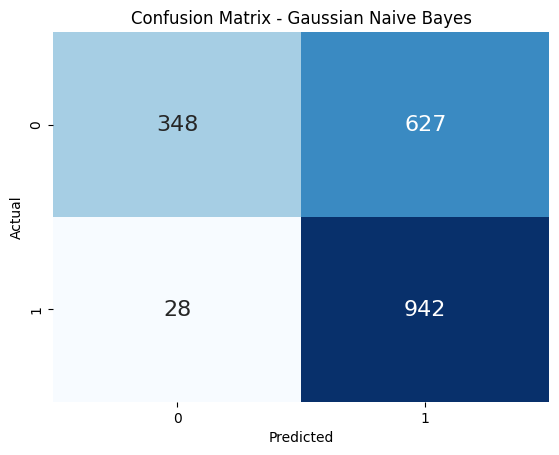

In [439]:
# Plot the confusion matrix for the GNB model
conf_matrix_gnb = confusion_matrix(y_test, y_gnb)
sns.heatmap(conf_matrix_gnb, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

- ROC curve represents the trade-off between the true positive rate (sensitivity) and the false positive rate as the classification threshold changes for the GNB model.
- plt.figure(figsize=(8, 6)): Sets the size of the figure to be displayed.
- plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(auc_gnb)): Plots the ROC curve using the false positive rate (fpr_gnb) on the x-axis and the true positive rate (tpr_gnb) on the y-axis. The label parameter indicates the label for the curve, including the AUC (Area Under the Curve) score of the GNB model.
- plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing'): Plots the diagonal line representing random guessing. This line helps to visualize the performance of the GNB model compared to random chance.
- plt.xlabel('False Positive Rate') and plt.ylabel('True Positive Rate'): Labels the x-axis and y-axis, respectively.
- plt.title('ROC Curve - Gaussian Naive Bayes'): Sets the title for the ROC curve plot.
- plt.legend(): Displays the legend containing labels for different curves.

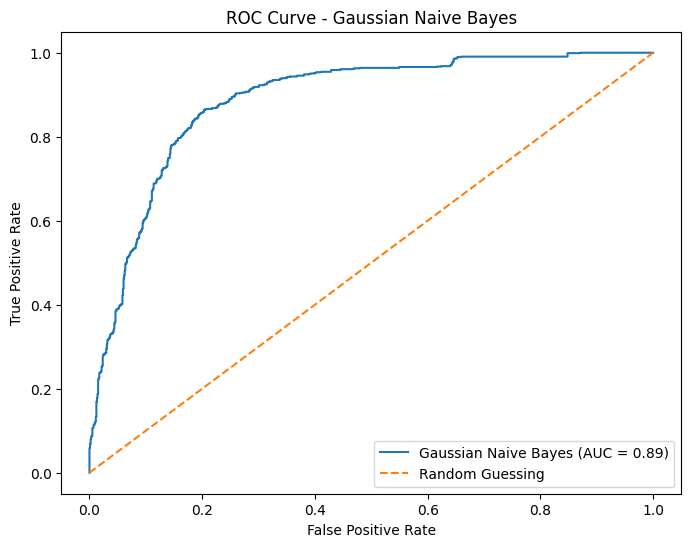

In [440]:
# Plot the ROC curve for the GNB model
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(auc_gnb))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend()
plt.show()

### Random Forest (RF)

- This below code demonstrates building a Random Forest classifier, evaluating its performance using multiple metrics, and assessing its predictive power on the test data.
- n_estimators=100: Specifies the number of decision trees in the Random Forest ensemble.
criterion='entropy': Indicates the measure used for the quality of a split. In this case, it's based on information gain using entropy.
- random_state=42: Ensures reproducibility by setting a seed for random number generation.
- X_train_std and y_train are the standardized features and corresponding target labels used for training the model.
- Uses the trained Random Forest model to make predictions on the standardized testing data X_test_std.

In [441]:
# Create an instance of the random forest classifier a criterion of entropy and a random state of 42
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=42)

# Fit the random forest model to the standardized training data
model_rf.fit(X_train_std, y_train)

# Use the trained model to make predictions on the standardized testing data
y_rf = model_rf.predict(X_test_std)

# Use the trained model to predict the class probabilities for the standardized testing data
y_prob_rf = model_rf.predict_proba(X_test_std)

# Calculate the accuracy of the random forest model on the testing data
accuracy_rf = accuracy_score(y_test, y_rf)

# Calculate the area under the ROC curve for the random forest model on the testing data
auc_rf = roc_auc_score(y_test, y_prob_rf[:, 1])

# Calculate the F1 score of the random forest model on the testing data
f1_rf = f1_score(y_test, y_rf)

# Calculate the precision of the random forest model on the testing data
precision_rf = precision_score(y_test, y_rf)

# Calculate the recall of the random forest model on the testing data
recall_rf = recall_score(y_test, y_rf)

# Print the accuracy, AUC, F1 score, precision, and recall for the random forest model
print("Random Forest Model")
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("AUC: {:.2f}".format(auc_rf))
print("F1 Score: {:.2f}".format(f1_rf))
print("Precision: {:.2f}".format(precision_rf))
print("Recall: {:.2f}".format(recall_rf))

# Calculate the false positive rate and true positive rate for the random forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf[:, 1])

# Calculate the sensitivity and specificity of the random forest model
sensitivity_rf, specificity_rf = sens_specs_calculator(y_test, y_rf)

# Print the sensitivity and specificity of the random forest model
print("Sensitivity: {:.2f}%".format(sensitivity_rf * 100))
print("Specificity: {:.2f}%".format(specificity_rf * 100))

# Print the classification report for the random forest model
print("\nClassification Report:\n", classification_report(y_test, y_rf))


Random Forest Model
Accuracy: 95.42%
AUC: 0.99
F1 Score: 0.95
Precision: 0.95
Recall: 0.96
Sensitivity: 96.19%
Specificity: 94.67%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       975
           1       0.95      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



- The below code is provided generates a heatmap visualization of the confusion matrix for the Random Forest model's predictions.
- y_test contains the actual target labels from the test dataset, while y_rf holds the predicted labels generated by the Random Forest model.
- Uses Seaborn's heatmap function to visualize the confusion matrix.
- annot=True displays the numerical values within the heatmap.
- cmap='Blues' sets the color scheme to shades of blue.
- fmt='g' specifies the format for annotations as integers.

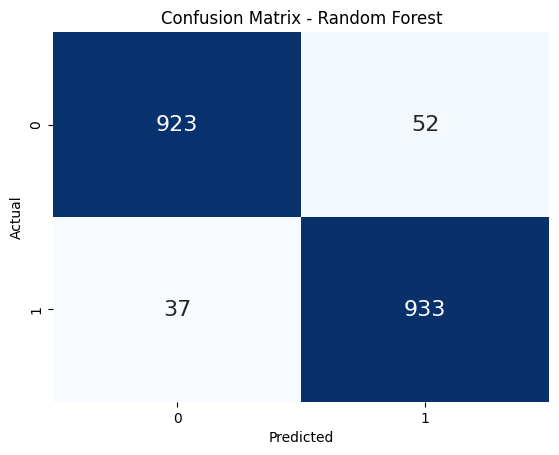

In [442]:
# Plot the confusion matrix for the random forest model
conf_matrix_rf = confusion_matrix(y_test, y_rf)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

- This code generates an ROC (Receiver Operating Characteristic) curve for the Random Forest model
- plt.figure(figsize=(8, 6)): This initializes a new figure for the ROC curve plot with a specific size of 8x6 inches.
- plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf)): This plots the ROC curve using the False Positive Rate (fpr_rf) on the x-axis and the True Positive Rate (tpr_rf) on the y-axis. It labels the curve with the AUC (Area Under the Curve) value obtained from the Random Forest model's predictions. fpr_rf and tpr_rf are the false positive rates and true positive rates calculated from the model's predicted probabilities.
- plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing'): This plots a diagonal dashed line representing the ROC curve of a random guessing model (random classifier), where the True Positive Rate equals the False Positive Rate.

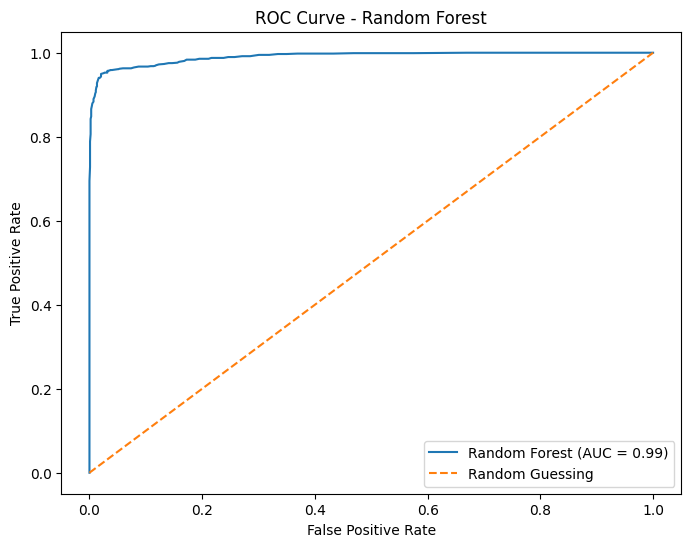

In [443]:
# Plot the ROC curve for the random forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

### K-Nearest Neighbors (KNN)
- The K-Nearest Neighbors (KNN) algorithm is a non-parametric, instance-based learning method used for classification and regression tasks

- This below code segment builds a KNN classifier with 2 neighbors, trains it on the training data, evaluates its performance on the testing data, and computes various evaluation metrics to assess its predictive capability and generalization. Additionally, it calculates sensitivity, specificity, and generates a classification report for a more detailed performance analysis.

In [444]:
# Create the KNN classifier object with 2 neighbors
model_knn = KNeighborsClassifier(n_neighbors=2)

# Train the classifier on the training data
model_knn.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_knn = model_knn.predict(X_test)

# Use the trained model to predict the class probabilities for the testing data
y_prob_knn = model_knn.predict_proba(X_test)[:, 1]

# Calculate the accuracy of the KNN model on the testing data
accuracy_knn = accuracy_score(y_test, y_knn)

# Calculate the area under the ROC curve for the KNN model on the testing data
auc_knn = roc_auc_score(y_test, y_prob_knn)

# Calculate the F1 score of the KNN model on the testing data
f1_knn = f1_score(y_test, y_knn)

# Calculate the precision of the KNN model on the testing data
precision_knn = precision_score(y_test, y_knn)

# Calculate the recall of the KNN model on the testing data
recall_knn = recall_score(y_test, y_knn)

# Print the accuracy, AUC, F1 score, precision, and recall for the KNN model
print("K-Nearest Neighbors Model")
print("Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("AUC: {:.2f}".format(auc_knn))
print("F1 Score: {:.2f}".format(f1_knn))
print("Precision: {:.2f}".format(precision_knn))
print("Recall: {:.2f}".format(recall_knn))

# Calculate the false positive rate and true positive rate for the KNN model
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)

# Calculate the sensitivity and specificity of the KNN model
sensitivity_knn, specificity_knn = sens_specs_calculator(y_test, y_knn)

# Print the sensitivity and specificity of the KNN model
print("Sensitivity: {:.2f}%".format(sensitivity_knn * 100))
print("Specificity: {:.2f}%".format(specificity_knn * 100))

# Print the classification report for the KNN model
print("\nClassification Report:\n", classification_report(y_test, y_knn))

K-Nearest Neighbors Model
Accuracy: 92.29%
AUC: 0.94
F1 Score: 0.92
Precision: 0.90
Recall: 0.95
Sensitivity: 94.74%
Specificity: 89.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       975
           1       0.90      0.95      0.92       970

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



- The below code generates a confusion matrix visualization for the K-Nearest Neighbors (KNN) model's predictions on the testing data. 

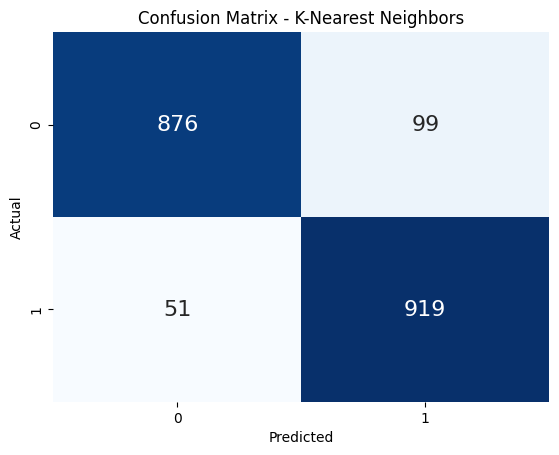

In [445]:
# Plot the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_knn)
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

This below code generates an ROC curve, which is a graphical representation illustrating the performance of the KNN model in binary classification tasks.

Key Steps are as below:
- Figure Setup: plt.figure(figsize=(8, 6)) initiates a new figure for the ROC curve, specifying its size to be 8 inches in width and 6 inches in height.
- Plotting the Curve: plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (AUC = {:.2f})'.format(auc_knn)) plots the ROC curve using the False Positive Rate (FPR) on the x-axis and True Positive Rate (TPR or Sensitivity) on the y-axis. The label for the curve includes the area under the curve (AUC) value for the KNN model.
- Random Guessing Line: plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing') adds a dashed line representing a random guessing classifier. This line signifies the scenario where the model's predictions are random, with an equal probability of true positives and false positives.

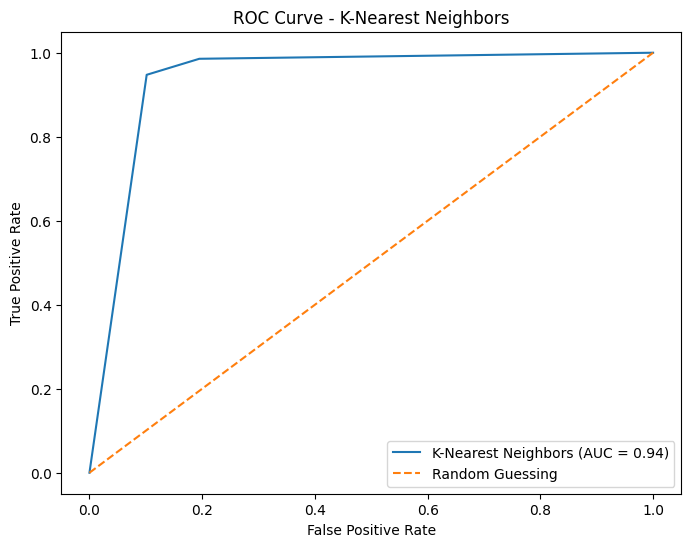

In [446]:
# Plot the ROC curve for the KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors (AUC = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend()
plt.show()


### Light Gradient Boosting Machine (LGBM)
- Light Gradient Boosting Machine (LGBM) is a machine learning algorithm based on gradient boosting framework that utilizes tree-based learning algorithms. It's known for its efficiency, speed, and high performance in handling large datasets.

- The below provided code showcases the implementation and evaluation of the Light Gradient Boosting Machine (LGBM) classifier with 100 trees and a random state of 42. Here's a summary of the steps performed

- LGBM Classifier Initialization: model_lgbm = LGBMClassifier(n_estimators=100, random_state=42) creates an instance of the LGBM classifier with 100 trees and a random state set to 42.
- Training the LGBM Model: model_lgbm.fit(X_train_std, y_train) trains the LGBM model using the standardized training data (X_train_std features and y_train target).
- Making Predictions: y_lgbm = model_lgbm.predict(X_test_std) utilizes the trained LGBM model to make predictions on the standardized testing dataset (X_test_std features).
- Predicting Class Probabilities: y_prob_lgbm = model_lgbm.predict_proba(X_test_std) calculates the class probabilities (probability estimates) for the standardized testing data.
- Evaluation Metrics: Accuracy: Computes the accuracy score of the LGBM model using accuracy_lgbm = accuracy_score(y_test, y_lgbm).
Area Under the ROC Curve (AUC): Evaluates the AUC score for the LGBM model on the testing data with auc_lgbm = roc_auc_score(y_test, y_prob_lgbm[:, 1]).

In [447]:
# Create an instance of the LGBMClassifier with 100 trees and a random state of 42
model_lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# Fit the LGBM model to the standardized training data
model_lgbm.fit(X_train_std, y_train)

# Use the trained model to make predictions on the standardized testing data
y_lgbm = model_lgbm.predict(X_test_std)

# Use the trained model to predict the class probabilities for the standardized testing data
y_prob_lgbm = model_lgbm.predict_proba(X_test_std)

# Calculate the accuracy of the LGBM model on the testing data
accuracy_lgbm = accuracy_score(y_test, y_lgbm)

# Calculate the area under the ROC curve for the LGBM model on the testing data
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm[:, 1])

# Calculate the F1 score of the LGBM model on the testing data
f1_lgbm = f1_score(y_test, y_lgbm)

# Calculate the precision of the LGBM model on the testing data
precision_lgbm = precision_score(y_test, y_lgbm)

# Calculate the recall of the LGBM model on the testing data
recall_lgbm = recall_score(y_test, y_lgbm)

# Print the accuracy, AUC, F1 score, precision, and recall for the LGBM model
print("Light Gradient Boosting Machine Model")
print("Accuracy: {:.2f}%".format(accuracy_lgbm * 100))
print("AUC: {:.2f}".format(auc_lgbm))
print("F1 Score: {:.2f}".format(f1_lgbm))
print("Precision: {:.2f}".format(precision_lgbm))
print("Recall: {:.2f}".format(recall_lgbm))

# Calculate the false positive rate and true positive rate for the LGBM model
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_prob_lgbm[:, 1])

# Calculate the sensitivity and specificity of the LGBM model
sensitivity_lgbm, specificity_lgbm = sens_specs_calculator(y_test, y_lgbm)

# Print the sensitivity and specificity of the LGBM model
print("Sensitivity: {:.2f}%".format(sensitivity_lgbm * 100))
print("Specificity: {:.2f}%".format(specificity_lgbm * 100))

# Print the classification report for the LGBM model
print("\nClassification Report:\n", classification_report(y_test, y_lgbm))


[LightGBM] [Info] Number of positive: 3891, number of negative: 3886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 7777, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500321 -> initscore=0.001286
[LightGBM] [Info] Start training from score 0.001286
Light Gradient Boosting Machine Model
Accuracy: 95.17%
AUC: 0.99
F1 Score: 0.95
Precision: 0.95
Recall: 0.96
Sensitivity: 95.67%
Specificity: 94.67%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       975
           1       0.95      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
we

- The code generates a visualization of the confusion matrix for the Light Gradient Boosting Machine (LGBM) model. Here's a summary of what the code accomplishes:
- Confusion Matrix Calculation: conf_matrix_lgbm = confusion_matrix(y_test, y_lgbm) calculates the confusion matrix for the LGBM model using the predicted labels (y_lgbm) and the actual labels from the testing dataset (y_test).
- Visualization using Heatmap: sns.heatmap() from the Seaborn library creates a heatmap representation of the confusion matrix.
annot=True displays the actual numeric values within the heatmap cells.
cmap='Blues' sets the color scheme for the heatmap to shades of blue.
fmt='g' formats the annotation as integers.
cbar=False removes the color bar.
annot_kws={"fontsize":16} sets the font size for the annotations to 16.
Plot Configuration:

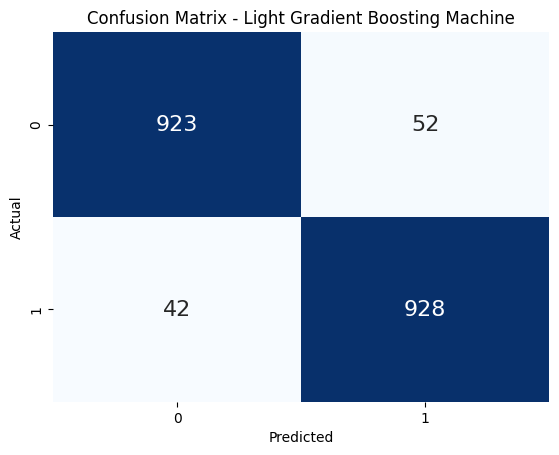

In [448]:
# Plot the confusion matrix for the LGBM model
conf_matrix_lgbm = confusion_matrix(y_test, y_lgbm)
sns.heatmap(conf_matrix_lgbm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Light Gradient Boosting Machine')
plt.show()

- The provided code generates a visualization of the confusion matrix for the Light Gradient Boosting Machine (LGBM) model.
- Confusion Matrix Calculation: conf_matrix_lgbm = confusion_matrix(y_test, y_lgbm) calculates the confusion matrix for the LGBM model using the predicted labels (y_lgbm) and the actual labels from the testing dataset (y_test).
- Visualization using Heatmap: sns.heatmap() from the Seaborn library creates a heatmap representation of the confusion matrix.
annot=True displays the actual numeric values within the heatmap cells.
cmap='Blues' sets the color scheme for the heatmap to shades of blue.
fmt='g' formats the annotation as integers.
cbar=False removes the color bar.
annot_kws={"fontsize":16} sets the font size for the annotations to 16.
Plot Configuration:

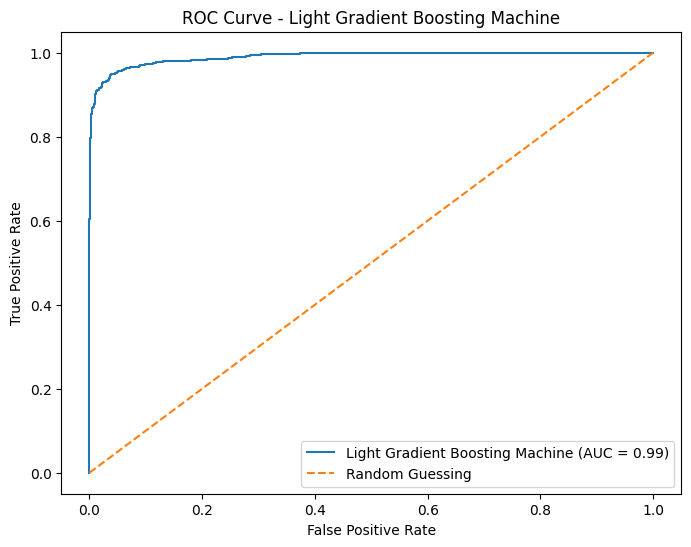

In [449]:
# Plot the ROC curve for the LGBM model
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label='Light Gradient Boosting Machine (AUC = {:.2f})'.format(auc_lgbm))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Light Gradient Boosting Machine')
plt.legend()
plt.show()

### XGBoost (XGB)
- XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm used for supervised learning tasks, especially in regression and classification problems. It's a type of gradient boosting algorithm that has gained significant popularity due to its speed and performance in various data science competitions.

Let's summerize the below code:
- Initializing XGBoost Classifier: An instance of the XGBClassifier is created, specifying the objective as "binary:logistic" and setting the random state to 42. This classifier is used for binary classification tasks.
- Training the Model: The XGBoost model is trained using the fit function on the standardized training data (X_train_std and y_train).
- Making Predictions: After the model is trained, predictions are made on the standardized testing data (X_test_std) using the predict method, generating the predicted labels (y_xgb).
- Probability Predictions: Additionally, the predict_proba method is used to calculate class probabilities for the testing data, specifically the probability of belonging to the positive class. These probabilities are stored in y_prob_xgb.
- Performance Evaluation: Several evaluation metrics are computed to assess the model's performance on the testing data, including accuracy, area under the ROC curve (AUC), F1 score, precision, and recall.
- Printing Evaluation Metrics: The calculated evaluation metrics (accuracy, AUC, F1 score, precision, recall, sensitivity, and specificity) are printed to evaluate the model's effectiveness in classification.
- ROC Curve: The false positive rate (FPR) and true positive rate (TPR) are calculated to plot the Receiver Operating Characteristic (ROC) curve. This curve represents the trade-off between true positive rate and false positive rate at various thresholds.
- Sensitivity and Specificity: Sensitivity and specificity are calculated and printed, representing the model's ability to correctly identify positive cases and negative cases, respectively.

In [450]:
# Create an instance of the XGBClassifier with the objective of "binary:logistic" and a random state of 42
model_xgb = XGBClassifier(objective="binary:logistic", random_state=42)

# Fit the XGB model to the standardized training data
model_xgb.fit(X_train_std, y_train)

# Use the trained model to make predictions on the standardized testing data
y_xgb = model_xgb.predict(X_test_std)

# Use the trained model to predict the class probabilities for the standardized testing data
y_prob_xgb = model_xgb.predict_proba(X_test_std)

# Calculate the accuracy of the XGB model on the testing data
accuracy_xgb = accuracy_score(y_test, y_xgb)

# Calculate the area under the ROC curve for the XGB model on the testing data
auc_xgb = roc_auc_score(y_test, y_prob_xgb[:, 1])

# Calculate the F1 score of the XGB model on the testing data
f1_xgb = f1_score(y_test, y_xgb)

# Calculate the precision of the XGB model on the testing data
precision_xgb = precision_score(y_test, y_xgb)

# Calculate the recall of the XGB model on the testing data
recall_xgb = recall_score(y_test, y_xgb)

# Print the accuracy, AUC, F1 score, precision, and recall for the XGB model
print("XGBoost Model")
print("Accuracy: {:.2f}%".format(accuracy_xgb * 100))
print("AUC: {:.2f}".format(auc_xgb))
print("F1 Score: {:.2f}".format(f1_xgb))
print("Precision: {:.2f}".format(precision_xgb))
print("Recall: {:.2f}".format(recall_xgb))

# Calculate the false positive rate and true positive rate for the XGB model    
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb[:, 1])

# Calculate the sensitivity and specificity of the XGB model
sensitivity_xgb, specificity_xgb = sens_specs_calculator(y_test, y_xgb)

# Print the sensitivity and specificity of the XGB model
print("Sensitivity: {:.2f}%".format(sensitivity_xgb * 100))
print("Specificity: {:.2f}%".format(specificity_xgb * 100))

# Print the classification report for the XGB model
print("\nClassification Report:\n", classification_report(y_test, y_xgb))

XGBoost Model
Accuracy: 95.42%
AUC: 0.99
F1 Score: 0.95
Precision: 0.95
Recall: 0.96
Sensitivity: 95.77%
Specificity: 95.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       975
           1       0.95      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



- The below code generates a visual representation of the confusion matrix for the XGBoost (Extreme Gradient Boosting) model's predictions on the test dataset. Here's a summary of the code's functionality:
- Confusion Matrix Calculation: The confusion matrix is calculated using confusion_matrix from the true labels (y_test) and the predicted labels (y_xgb) generated by the XGBoost model.
- Plotting the Confusion Matrix: The seaborn library's heatmap function is utilized to create a visual heatmap representation of the confusion matrix. It annotates the matrix cells with their corresponding values and employs a blue color scheme (cmap='Blues') for better visualization.
- Adjustments and Labels: Axes labels (xlabel and ylabel) are added to indicate the "Predicted" and "Actual" categories, respectively. The title of the plot is set as 'Confusion Matrix - XGBoost'.
- Displaying the Plot: 

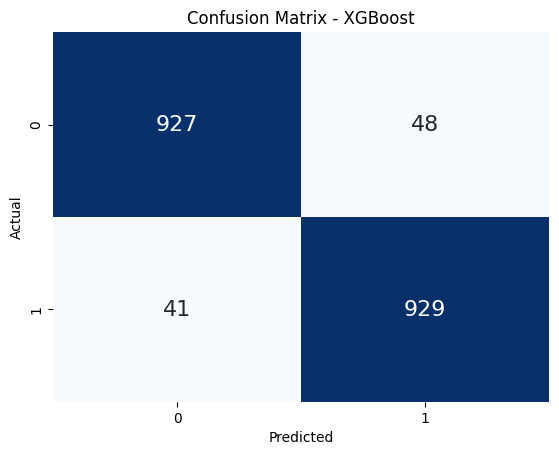

In [451]:
# Plot the confusion matrix for the XGB model
conf_matrix_xgb = confusion_matrix(y_test, y_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

- The below code generates an ROC (Receiver Operating Characteristic) curve for the XGBoost (Extreme Gradient Boosting) model.

Here's a summary of the code:

- Figure Size: The plot is set to a specific figure size of 8x6 inches using plt.figure(figsize=(8, 6)).
- ROC Curve Plotting: The ROC curve is created using plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc_xgb)), where fpr_xgb represents the false positive rates, tpr_xgb represents the true positive rates, and auc_xgb is the AUC (Area Under the Curve) score of the XGBoost model. This line visually displays the trade-off between the true positive rate and false positive rate across different thresholds for the model.
- Random Guessing Line: A dashed line indicating random guessing (where true positive rate equals false positive rate) is plotted using plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing').
- Axes Labels and Title: 

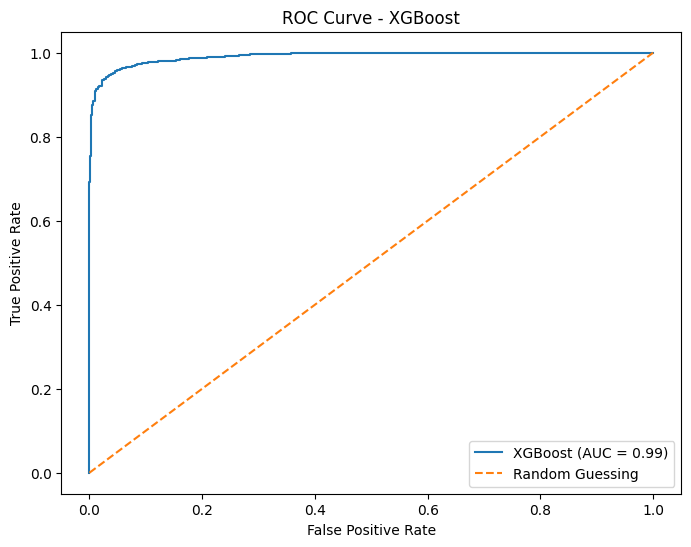

In [452]:
# Plot the ROC curve for the XGB model
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

## Performance Benchmark Across Models

- Now we generate comparative bar plots showcasing performance metrics across various machine learning models, specifically focusing on metrics like AUC, accuracy, F1 score, precision, sensitivity, and specificity. Additionally, it generates a summary table of these metrics for each model.

Here's a summary of the below code:

- Model Performance Metrics: A dictionary named metrics is created to store the performance metrics for different machine learning models like Decision Tree, SVM, Naive Bayes, Logistic Regression, Random Forest, K-NN, LightGBM, and XGBoost. Each metric (AUC, accuracy, F1 score, precision, sensitivity, specificity) for each model is stored in lists under respective keys.
- Bar Plot Creation: The code creates two separate bar plots. The first plot (Figure 1) displays Sensitivity, Specificity, and AUC scores for each model, while the second plot (Figure 2) shows Precision, Accuracy, and F1 Score for each model.
- Customization of Plots: Bar plots are customized by setting colors for different metrics, positioning bars for each model, labeling the axes, adding labels on top of each bar, setting the title, and providing a legend for each metric.
- Summary Table Creation: A summary table (performance_summary) is generated using Pandas DataFrame, displaying each model's performance metrics in a tabular format.
- Display and Output:
- Thus, In short, We would say that The below code serves the purpose of visually comparing the performance of multiple machine learning models across various evaluation metrics, aiding in selecting the most suitable model for the given task. Additionally, it provides a summarized view of model performances in a table format for further analysis and decision-making.







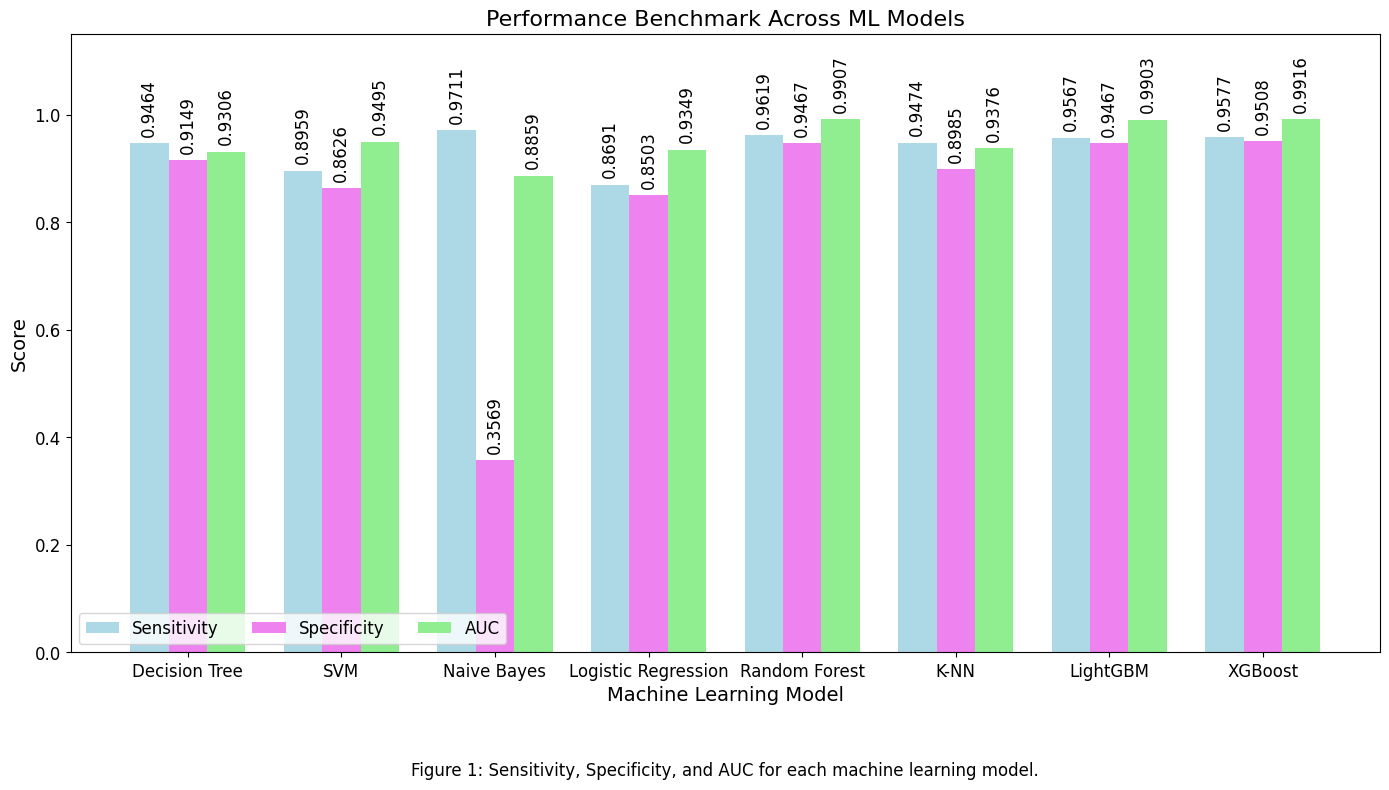

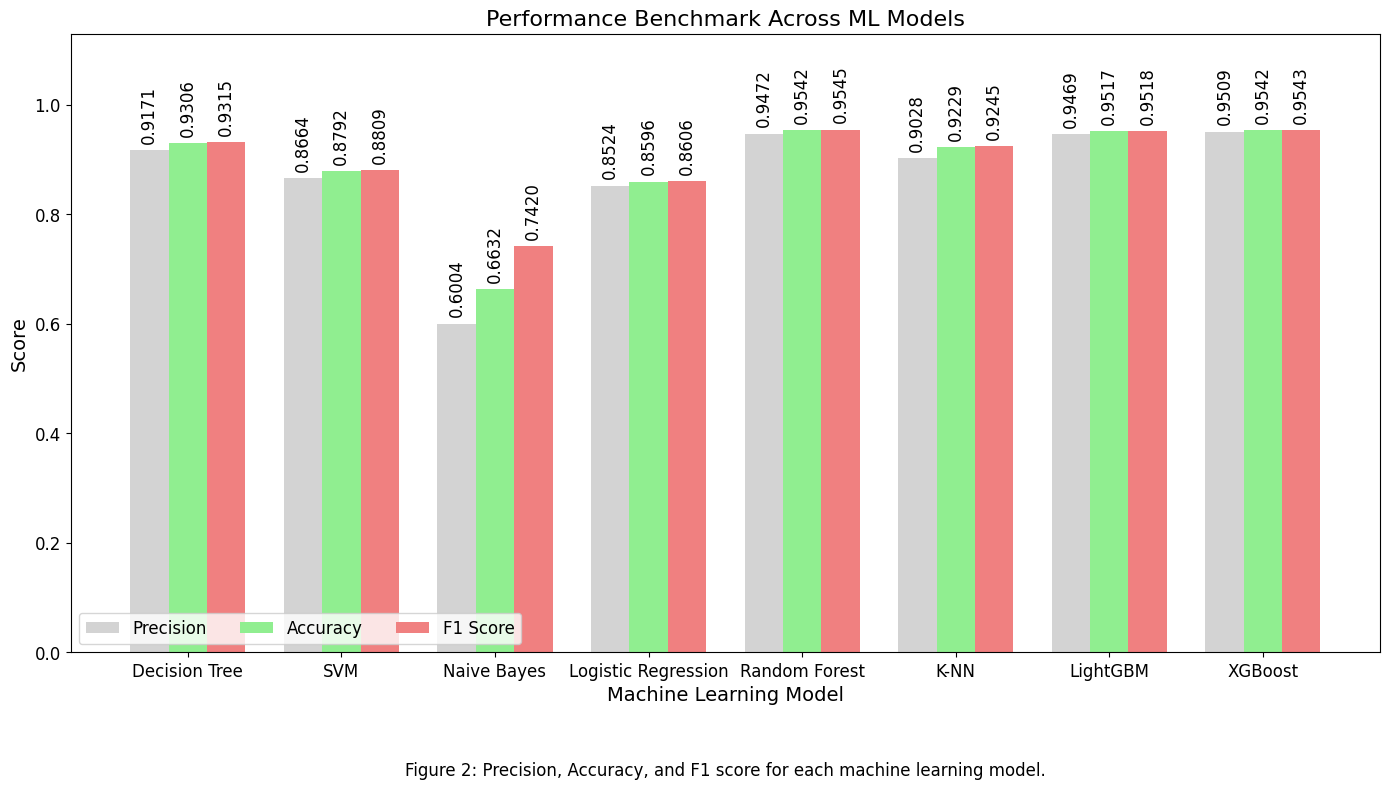

Summary Table of Performance Metrics for Each Model



,AUC,Accuracy,F1 Score,Precision,Sensitivity,Specificity
Decision Tree,0.9306,0.9306,0.9315,0.9171,0.9464,0.9149
SVM,0.9495,0.8792,0.8809,0.8664,0.8959,0.8626
Naive Bayes,0.8859,0.6632,0.7420,0.6004,0.9711,0.3569
Logistic Regression,0.9349,0.8596,0.8606,0.8524,0.8691,0.8503
Random Forest,0.9907,0.9542,0.9545,0.9472,0.9619,0.9467
K-NN,0.9376,0.9229,0.9245,0.9028,0.9474,0.8985
LightGBM,0.9903,0.9517,0.9518,0.9469,0.9567,0.9467
XGBoost,0.9916,0.9542,0.9543,0.9509,0.9577,0.9508


In [455]:
# Define the model names and their performance metrics
models = ["Decision Tree", "SVM", "Naive Bayes", "Logistic Regression", "Random Forest", "K-NN", "LightGBM", "XGBoost"]
metrics = {
    "AUC": [auc_dt, auc_svm, auc_gnb, auc_lr, auc_rf, auc_knn, auc_lgbm, auc_xgb],
    "Accuracy": [accuracy_dt, accuracy_svm, accuracy_gnb, accuracy_lr, accuracy_rf, accuracy_knn, accuracy_lgbm, accuracy_xgb],
    "F1 Score": [f1_dt, f1_svm, f1_gnb, f1_lr, f1_rf, f1_knn, f1_lgbm, f1_xgb],
    "Precision": [precision_dt, precision_svm, precision_gnb, precision_lr, precision_rf, precision_knn, precision_lgbm, precision_xgb],
    "Sensitivity": [sensitivity_dt, sensitivity_svm, sensitivity_gnb, sensitivity_lr, sensitivity_rf, sensitivity_knn, sensitivity_lgbm, sensitivity_xgb],
    "Specificity": [specificity_dt, specificity_svm, specificity_gnb, specificity_lr, specificity_rf, specificity_knn, specificity_lgbm, specificity_xgb]
}

# Function to add labels to the bars in the plot
def add_labels_to_bars(bars):
    """Display values above the bars."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Vertical offset of 3 points
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

# Set the width of the bars in the plot
bar_width = 0.25

# Define the positions for the labels on the x-axis
positions = np.arange(len(models))
offsets = [0, bar_width, 2 * bar_width]

# Plot Sensitivity, Specificity, and AUC for each model
fig1, ax = plt.subplots(figsize=(14, 8))
colors = ["lightblue", "violet", "lightgreen"]
labels = ["Sensitivity", "Specificity", "AUC"]

for i, metric in enumerate(labels):
    bars = ax.bar(positions + offsets[i], metrics[metric], bar_width, label=metric, color=colors[i])

ax.set_ylim([0, 1.15])
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(models, fontsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='lower left', ncol=3, fontsize=12)
for metric in labels:
    add_labels_to_bars(ax.containers[labels.index(metric)])
ax.set_title('Performance Benchmark Across ML Models', fontsize=16)
ax.text(0.5, -0.2, "Figure 1: Sensitivity, Specificity, and AUC for each machine learning model.", fontsize=12, ha="center", transform=ax.transAxes)
fig1.tight_layout()
plt.show()

# Plot Precision, Accuracy, and F1 Score for each model
fig2, ax = plt.subplots(figsize=(14, 8))
colors = ["lightgrey", "lightgreen", "lightcoral"]
labels = ["Precision", "Accuracy", "F1 Score"]

for i, metric in enumerate(labels):
    bars = ax.bar(positions + offsets[i], metrics[metric], bar_width, label=metric, color=colors[i])

ax.set_ylim([0, 1.13])
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(models, fontsize=12)
ax.set_xlabel("Machine Learning Model", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='lower left', ncol=3, fontsize=12)
for metric in labels:
    add_labels_to_bars(ax.containers[labels.index(metric)])
ax.set_title('Performance Benchmark Across ML Models', fontsize=16)
ax.text(0.5, -0.2, "Figure 2: Precision, Accuracy, and F1 score for each machine learning model.", fontsize=12, ha="center", transform=ax.transAxes)
fig2.tight_layout()
plt.show()

# Create a summary table of the performance metrics for each model
performance_summary = pd.DataFrame({'Model': models})
for metric in metrics:
    performance_summary[metric] = metrics[metric]

performance_summary = performance_summary.set_index('Model')
performance_summary.index.name = None
performance_summary = performance_summary.round(4)

# Print the summary table
print("Summary Table of Performance Metrics for Each Model\n")
display(performance_summary)

# Save the generated plots to the output folder and the performance summary table to the output folder
#fig1.savefig(r'C:\Users\rk178\Desktop\MS\DM\Project\Figures\figure1.png', bbox_inches='tight')
#fig2.savefig(r'C:\Users\rk178\Desktop\MS\DM\Project\Figures\figure2.png', bbox_inches='tight')
#performance_summary.to_csv(r'C:\Users\rk178\Desktop\MS\DM\Project\Figures\performance_summary.csv')



- Now, we aim to compeare feature importances between two machine learning models, Random Forest (RF) and XGBoost (XGB). It uses various techniques to showcase the importance of different features in these models.
Below are the some key notes for the further code:
- Obtaining Feature Names: feature_names is an array containing the names of the features obtained from the dataset, excluding the target variable (the last column).
- Random Forest Feature Importance: model_rf.feature_importances_: Retrieves the feature importances calculated by the Random Forest model.
Sorting the features based on their importance.
Creating a horizontal bar plot (ax1) displaying feature importances derived from the Random Forest model.
- Random Forest Permutation Importance: Utilizing permutation_importance from scikit-learn to compute the permutation importances for features using the Random Forest model.
Sorting the permutation importances.
Creating a box plot (ax2) to visualize the permutation importances derived from the Random Forest model.
- XGBoost Feature Importance and Permutation Importance: Similar operations are conducted for the XGBoost model. The feature importances and permutation importances are calculated and visualized using a horizontal bar plot (ax3) and a box plot (ax4), respectively.
- Plot Customization: Each subplot is customized to display feature names on the y-axis, importance scores on the x-axis, set labels, titles, and adjust plot sizes.
For box plots, outliers, mean importance, and importance range are represented using different colors for better visualization.


### Final Layout and Visualization:

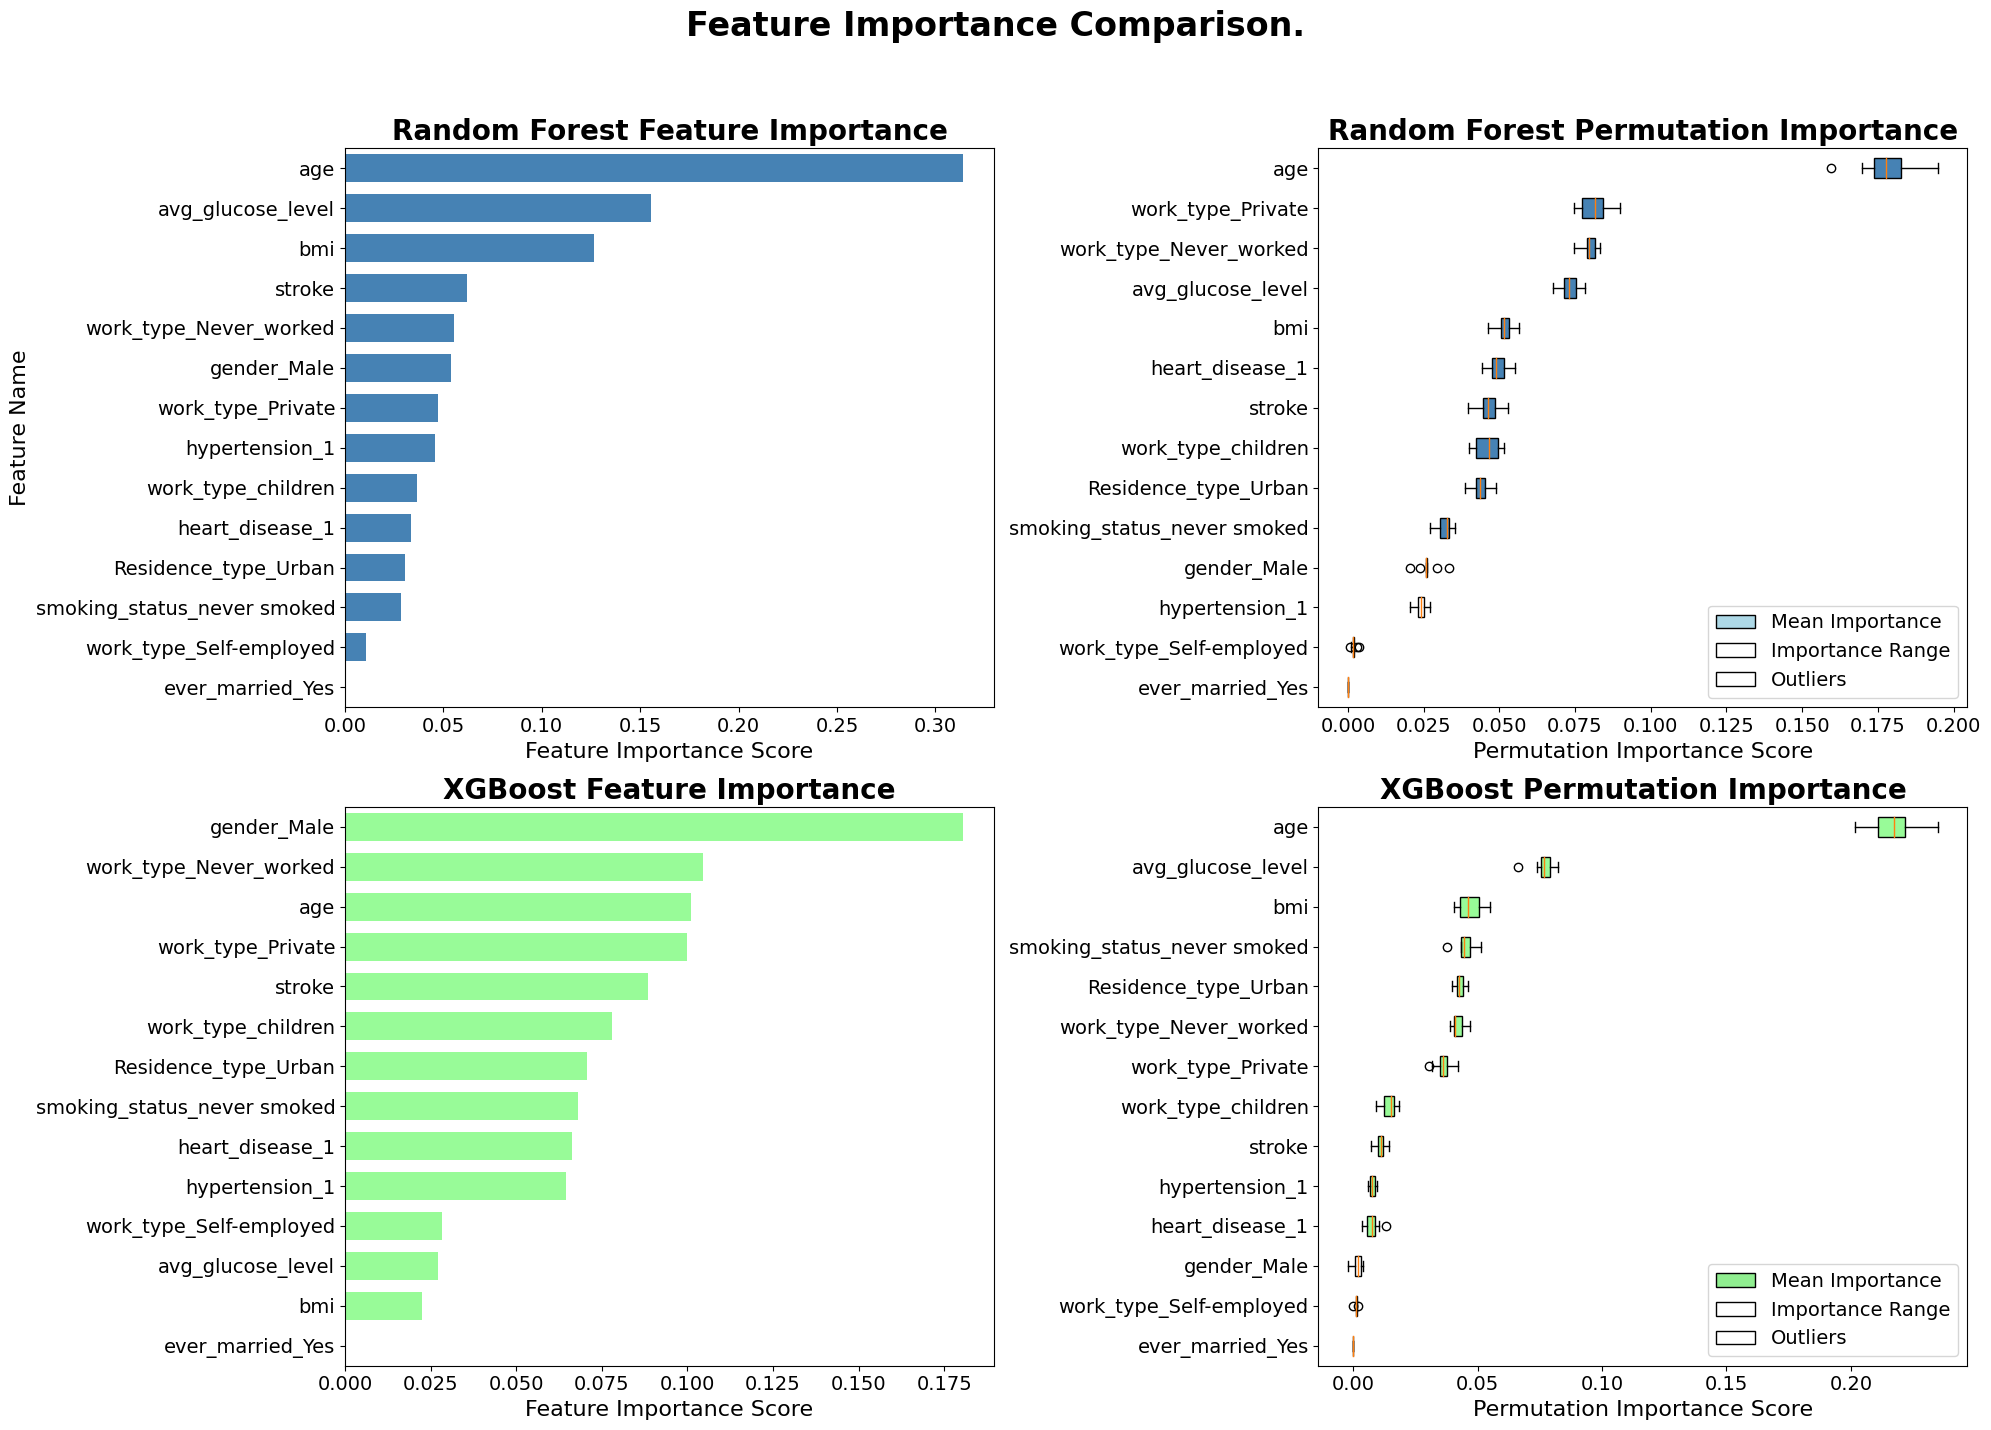

In [454]:
feature_names = stroke_data.columns[:-1].to_numpy()
rf_perm_imp = permutation_importance(model_rf, X_test_std, y_test, n_repeats=10, random_state=42)
rf_perm_sort_idx = rf_perm_imp.importances_mean.argsort()

rf_tree_sort_idx = np.argsort(model_rf.feature_importances_)
rf_indices = np.arange(0, len(model_rf.feature_importances_)) + 0.5

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# Random Forest Feature Importance
ax1.barh(rf_indices,model_rf.feature_importances_[rf_tree_sort_idx], height=0.7, color='steelblue')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xlabel("Feature Importance Score",fontsize=16)
ax1.set_ylabel("Feature Name",fontsize=16)
ax1.set_yticks(rf_indices)
ax1.set_yticklabels(feature_names[rf_tree_sort_idx], fontsize=14)
ax1.set_ylim((0, len(model_rf.feature_importances_)))
ax1.set_title("Random Forest Feature Importance", fontsize=20, fontweight='bold')

# Random Forest Permutation Importance
box = ax2.boxplot(rf_perm_imp.importances[rf_perm_sort_idx].T,vert=False,labels=feature_names[rf_perm_sort_idx], patch_artist=True, boxprops=dict(facecolor='steelblue'))
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel("Permutation Importance Score",fontsize=16)
ax2.set_title("Random Forest Permutation Importance", fontsize=20, fontweight='bold')
for patch, color in zip(box['boxes'], ['lightblue', 'white', 'white']):
    patch.set_facecolor(color)
ax2.legend([box["boxes"][0], box["boxes"][1], box["boxes"][2]], ['Mean Importance', 'Importance Range', 'Outliers'], loc='lower right', fontsize=14)

# XGBoost Feature Importance
xgb_perm_imp = permutation_importance(model_xgb, X_test_std, y_test, n_repeats=10, random_state=42)
xgb_perm_sort_idx = xgb_perm_imp.importances_mean.argsort()

xgb_tree_sort_idx = np.argsort(model_xgb.feature_importances_)
xgb_indices = np.arange(0, len(model_xgb.feature_importances_)) + 0.5

ax3.barh(xgb_indices,model_xgb.feature_importances_[xgb_tree_sort_idx], height=0.7, color='palegreen')
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.set_xlabel("Feature Importance Score",fontsize=16)
ax3.set_yticks(xgb_indices)
ax3.set_yticklabels(feature_names[xgb_tree_sort_idx], fontsize=14)
ax3.set_ylim((0, len(model_xgb.feature_importances_)))
ax3.set_title("XGBoost Feature Importance", fontsize=20, fontweight='bold')

# XGBoost Permutation Importance
box = ax4.boxplot(xgb_perm_imp.importances[xgb_perm_sort_idx].T,vert=False,labels=feature_names[xgb_perm_sort_idx], patch_artist=True, boxprops=dict(facecolor='palegreen'))
ax4.tick_params(axis='both', which='major', labelsize=14)
ax4.set_xlabel("Permutation Importance Score",fontsize=16)
ax4.set_title("XGBoost Permutation Importance", fontsize=20, fontweight='bold')
for patch, color in zip(box['boxes'], ['lightgreen', 'white', 'white']):
    patch.set_facecolor(color)
ax4.legend([box["boxes"][0], box["boxes"][1], box["boxes"][2]], ['Mean Importance', 'Importance Range', 'Outliers'], loc='lower right', fontsize=14)

fig.suptitle("Feature Importance Comparison.", fontsize=24, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.savefig(r'C:\Users\rk178\Desktop\MS\DM\Project\Figures\feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()